In [3]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('hotel_bookings.csv')

In [5]:
missing_values = data.isna().sum()

####  Handeling Missing Values

In [6]:
missing_values


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 1
children                               4
babies                                 0
meal                                   0
country                              507
market_segment                         2
distribution_channel                   1
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     1
assigned_room_type                     1
booking_changes                        0
deposit_type                          21
agent                              16340
company         

In [7]:
duplicated = data.duplicated().sum()

In [8]:
missing_values.dtypes

dtype('int64')

In [9]:
duplicated, missing_values


(31979,
 hotel                                  0
 is_canceled                            0
 lead_time                              0
 arrival_date_year                      0
 arrival_date_month                     0
 arrival_date_week_number               0
 arrival_date_day_of_month              0
 stays_in_weekend_nights                0
 stays_in_week_nights                   0
 adults                                 1
 children                               4
 babies                                 0
 meal                                   0
 country                              507
 market_segment                         2
 distribution_channel                   1
 is_repeated_guest                      0
 previous_cancellations                 0
 previous_bookings_not_canceled         0
 reserved_room_type                     1
 assigned_room_type                     1
 booking_changes                        0
 deposit_type                          21
 agent                    

### Fill missing object value with mode


In [10]:
object_cols = data.select_dtypes(include = ['object']).columns

In [11]:
object_cols


Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

In [12]:
data[object_cols] = data[object_cols].apply(lambda x:x.fillna(x.mode()[0]))


In [13]:
data.select_dtypes(include = ['object']).columns.isna().sum()

0

In [14]:
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 1
children                               4
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [15]:
data.select_dtypes(include=['int64','float64']).columns

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [16]:
select_cols=['adults','babies','agent','company']
data[select_cols].describe()


,adults,babies,agent,company
count,119389.000000,119390.000000,103050.000000,6797.000000
mean,1.856402,0.007949,86.693382,189.266735
std,0.579263,0.097436,110.774548,131.655015
min,0.000000,0.000000,1.000000,6.000000
25%,2.000000,0.000000,9.000000,62.000000
50%,2.000000,0.000000,14.000000,179.000000
75%,2.000000,0.000000,229.000000,270.000000
max,55.000000,10.000000,535.000000,543.000000


In [17]:
data['adults'] = data['adults'].fillna( data['adults'].mean())

In [18]:
 data['adults'].isna().sum()

0

In [19]:
columns_with_null = data.columns[data.isnull().any()].tolist()

In [20]:
columns_with_null

['children', 'agent', 'company']

In [21]:
data[columns_with_null]= data[columns_with_null].apply(lambda x:x.fillna(x.median()))

In [22]:
data.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [23]:
data.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2.0,...,No Deposit,14.0,179.0,0,Transient,0.0,0,0,Check-Out,01/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2.0,...,No Deposit,14.0,179.0,0,Transient,0.0,0,0,Check-Out,01/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1.0,...,No Deposit,14.0,179.0,0,Transient,75.0,0,0,Check-Out,02/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1.0,...,No Deposit,304.0,179.0,0,Transient,75.0,0,0,Check-Out,02/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2.0,...,No Deposit,240.0,179.0,0,Transient,98.0,0,1,Check-Out,03/07/2015
5,Resort Hotel,0,14,2015,July,27,1,0,2,2.0,...,No Deposit,240.0,179.0,0,Transient,98.0,0,1,Check-Out,03/07/2015
6,Resort Hotel,0,0,2015,July,27,1,0,2,2.0,...,No Deposit,14.0,179.0,0,Transient,107.0,0,0,Check-Out,03/07/2015
7,Resort Hotel,0,9,2015,July,27,1,0,2,2.0,...,No Deposit,303.0,179.0,0,Transient,103.0,0,1,Check-Out,03/07/2015
8,Resort Hotel,1,85,2015,July,27,1,0,3,2.0,...,No Deposit,240.0,179.0,0,Transient,82.0,0,1,Canceled,06/05/2015
9,Resort Hotel,1,75,2015,July,27,1,0,3,2.0,...,No Deposit,15.0,179.0,0,Transient,105.5,0,0,Canceled,22/04/2015


In [24]:
# to check duplicated values
data.duplicated().sum()

32009

In [25]:
#To delete duplicated values
data = data.drop_duplicates()

In [26]:
data.duplicated().sum()

0

In [27]:
numerical_data = data.select_dtypes(include = ['int64']).columns


In [28]:
data[numerical_data].mean()

is_canceled                          0.274980
lead_time                           79.915828
arrival_date_year                 2016.210263
arrival_date_week_number            26.840846
arrival_date_day_of_month           15.815440
stays_in_weekend_nights              1.005344
stays_in_week_nights                 2.625617
babies                               0.010826
is_repeated_guest                    0.039082
previous_cancellations               0.030419
previous_bookings_not_canceled       0.184022
booking_changes                      0.271638
days_in_waiting_list                 0.754169
required_car_parking_spaces          0.084240
total_of_special_requests            0.698584
dtype: float64

In [29]:
data[numerical_data].median()

is_canceled                          0.0
lead_time                           49.0
arrival_date_year                 2016.0
arrival_date_week_number            27.0
arrival_date_day_of_month           16.0
stays_in_weekend_nights              1.0
stays_in_week_nights                 2.0
babies                               0.0
is_repeated_guest                    0.0
previous_cancellations               0.0
previous_bookings_not_canceled       0.0
booking_changes                      0.0
days_in_waiting_list                 0.0
required_car_parking_spaces          0.0
total_of_special_requests            0.0
dtype: float64

In [30]:
data[numerical_data].mode()


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
0,0,0,2016,33,17,0,1,0,0,0,0,0,0,0,0


In [31]:
data[numerical_data].std()

is_canceled                        0.446507
lead_time                         86.068708
arrival_date_year                  0.686110
arrival_date_week_number          13.673549
arrival_date_day_of_month          8.834612
stays_in_weekend_nights            1.031960
stays_in_week_nights               2.053642
babies                             0.113606
is_repeated_guest                  0.193791
previous_cancellations             0.369177
previous_bookings_not_canceled     1.732041
booking_changes                    0.727295
days_in_waiting_list              10.103211
required_car_parking_spaces        0.281555
total_of_special_requests          0.831937
dtype: float64

In [32]:
categorical_data = [
    'hotel', 'country', 'market_segment', 'distribution_channel', 
    'is_repeated_guest', 'reserved_room_type', 'assigned_room_type', 
    'deposit_type', 'agent', 'company', 'customer_type', 'reservation_status'
]

In [33]:
for column in categorical_data:
    print(f"(Value counts for {column}:\n)")
    print(data[column].value_counts())

    print(f"(Value counts for {column}:\n)")
    print(data[column].value_counts(normalize= True)*100)



(Value counts for hotel:
)
City Hotel      53432
Resort Hotel    33949
Name: hotel, dtype: int64
(Value counts for hotel:
)
City Hotel      61.148305
Resort Hotel    38.851695
Name: hotel, dtype: float64
(Value counts for country:
)
PRT    27890
GBR    10433
FRA     8837
ESP     7252
DEU     5387
       ...  
MMR        1
BFA        1
CYM        1
MLI        1
KHM        1
Name: country, Length: 177, dtype: int64
(Value counts for country:
)
PRT    31.917694
GBR    11.939667
FRA    10.113182
ESP     8.299287
DEU     6.164956
         ...    
MMR     0.001144
BFA     0.001144
CYM     0.001144
MLI     0.001144
KHM     0.001144
Name: country, Length: 177, dtype: float64
(Value counts for market_segment:
)
Online TA        51618
Offline TA/TO    13885
Direct           11798
Groups            4943
Corporate         4206
Complementary      702
Aviation           227
Undefined            2
Name: market_segment, dtype: int64
(Value counts for market_segment:
)
Online TA        59.072338
Offlin

In [34]:
import seaborn as sns

####  Box plots for numerical columns


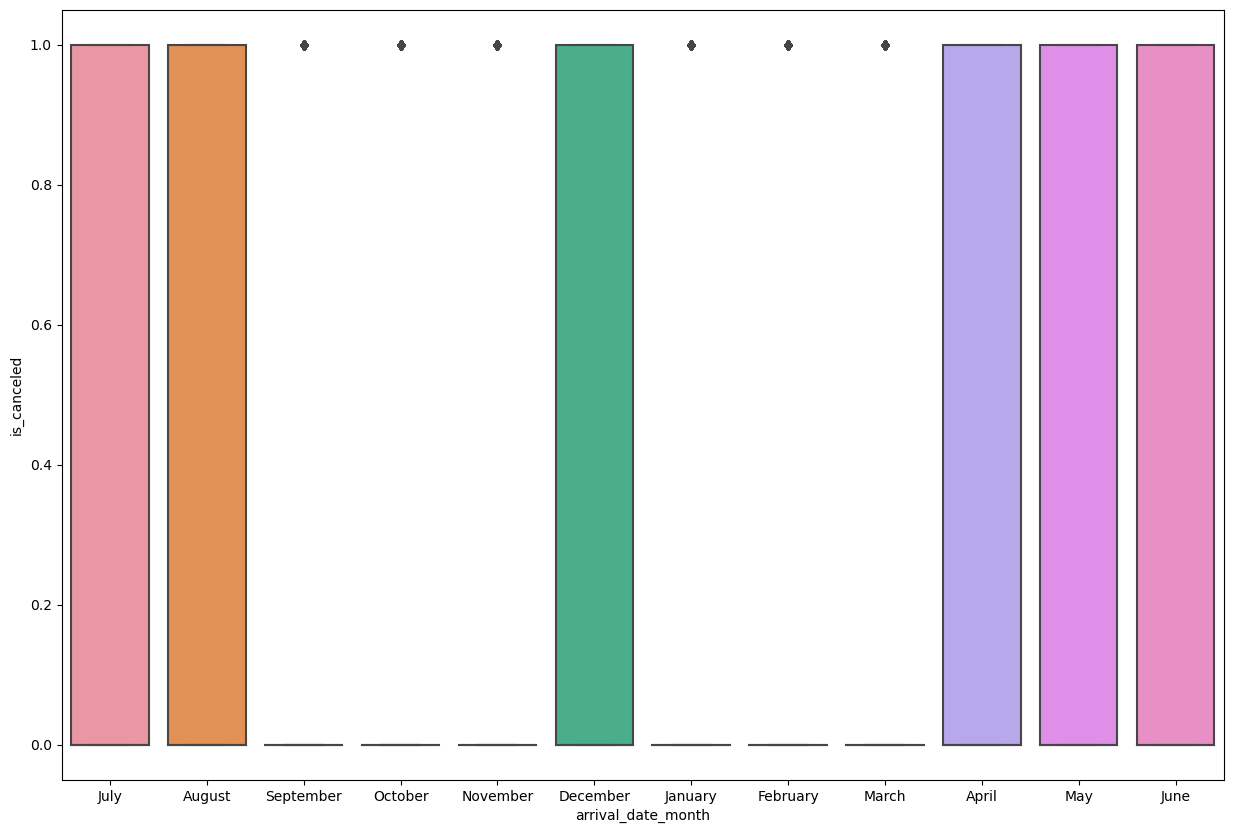

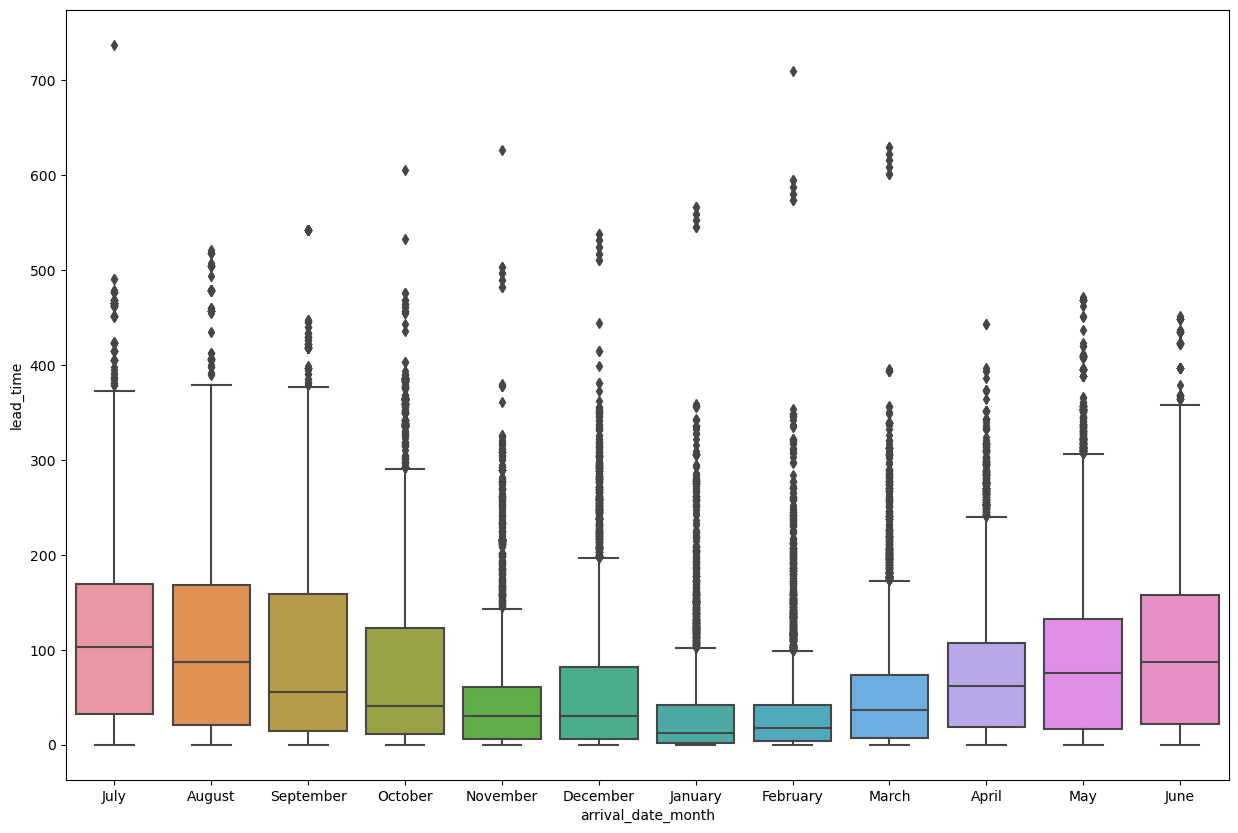

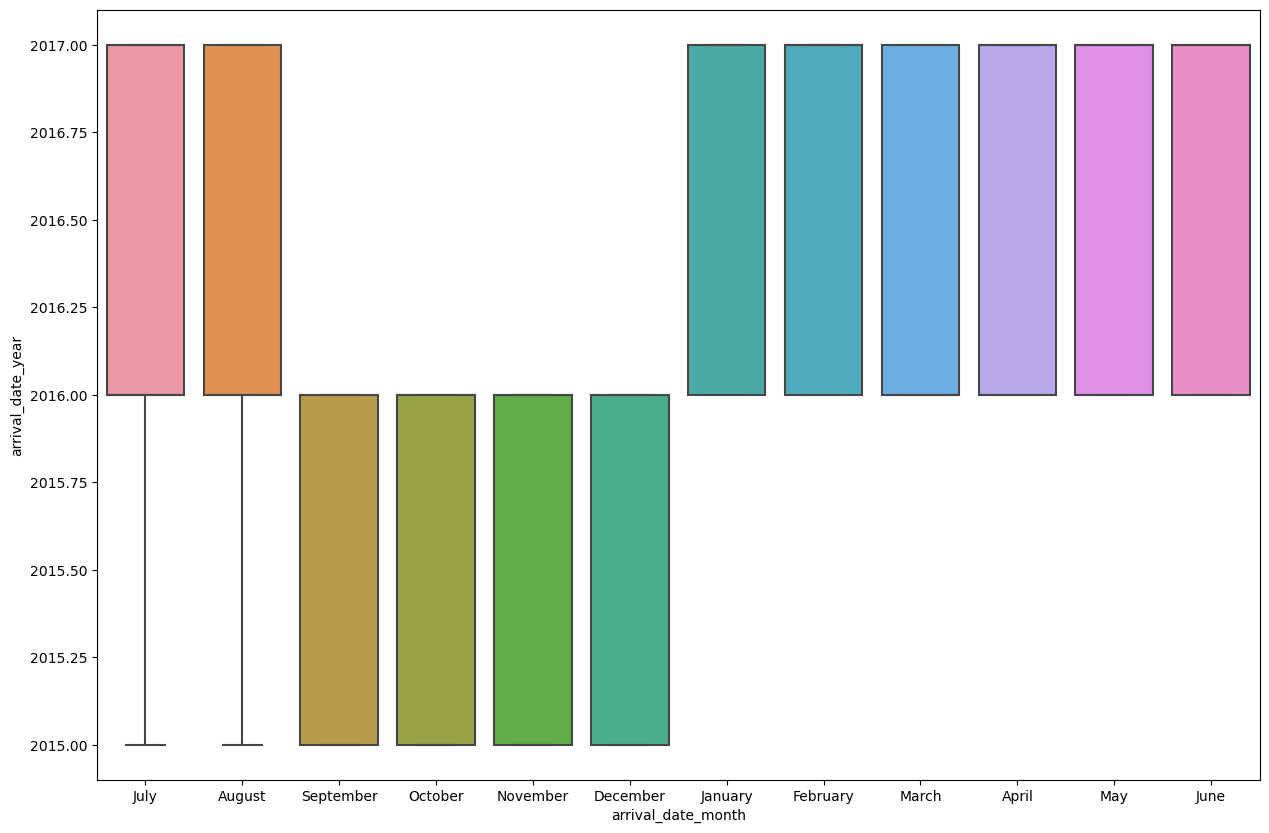

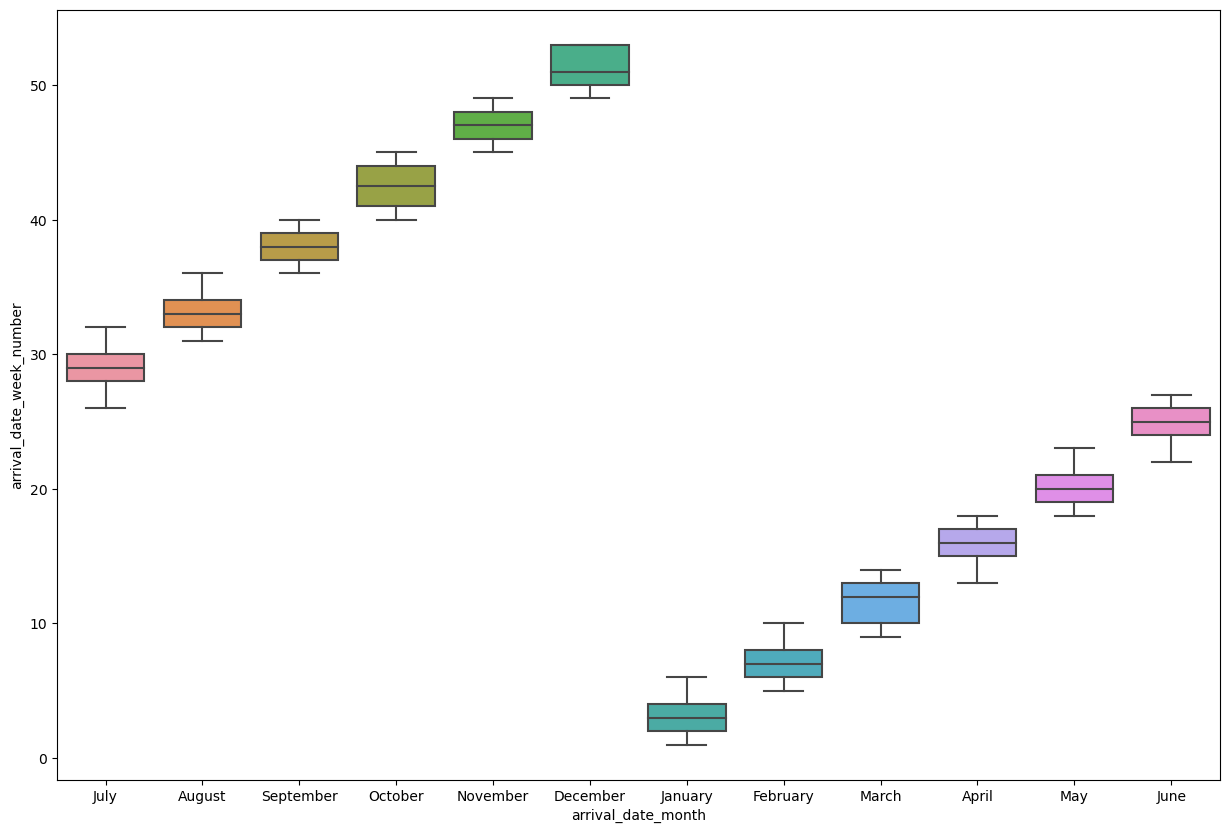

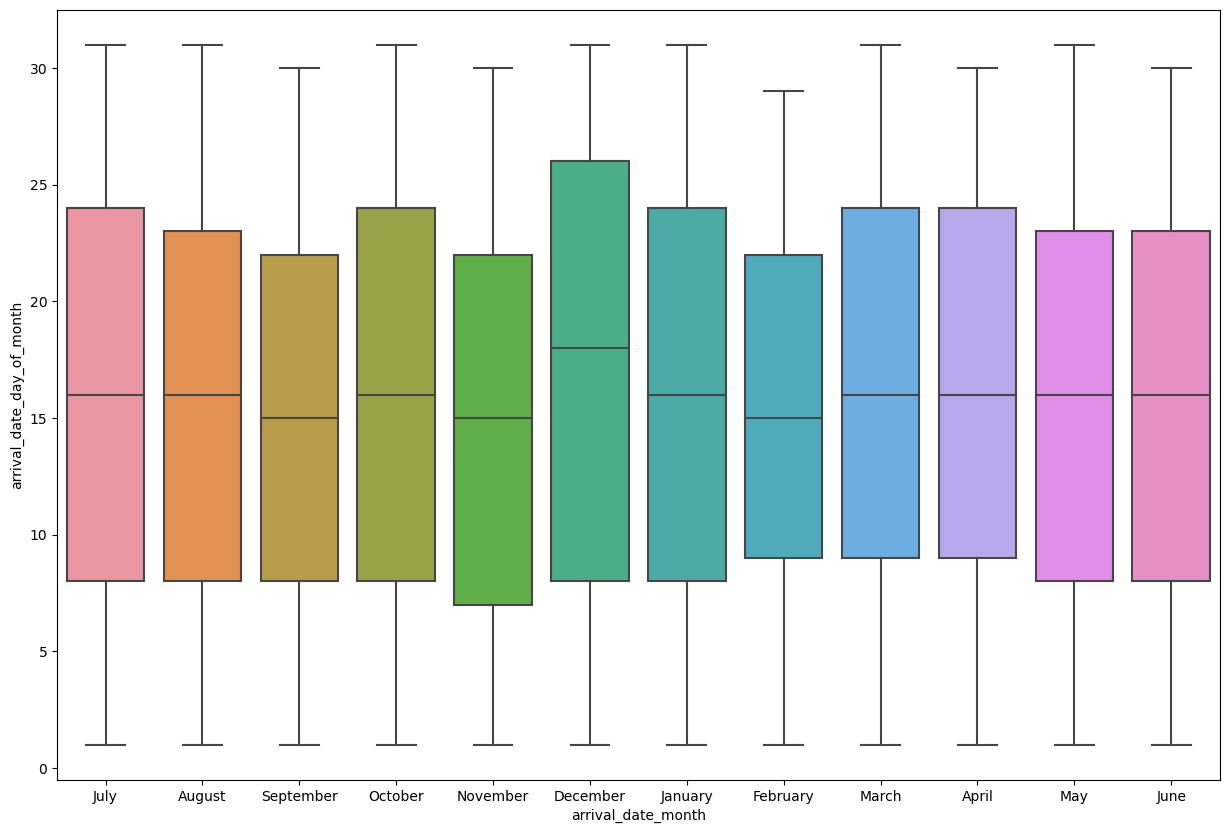

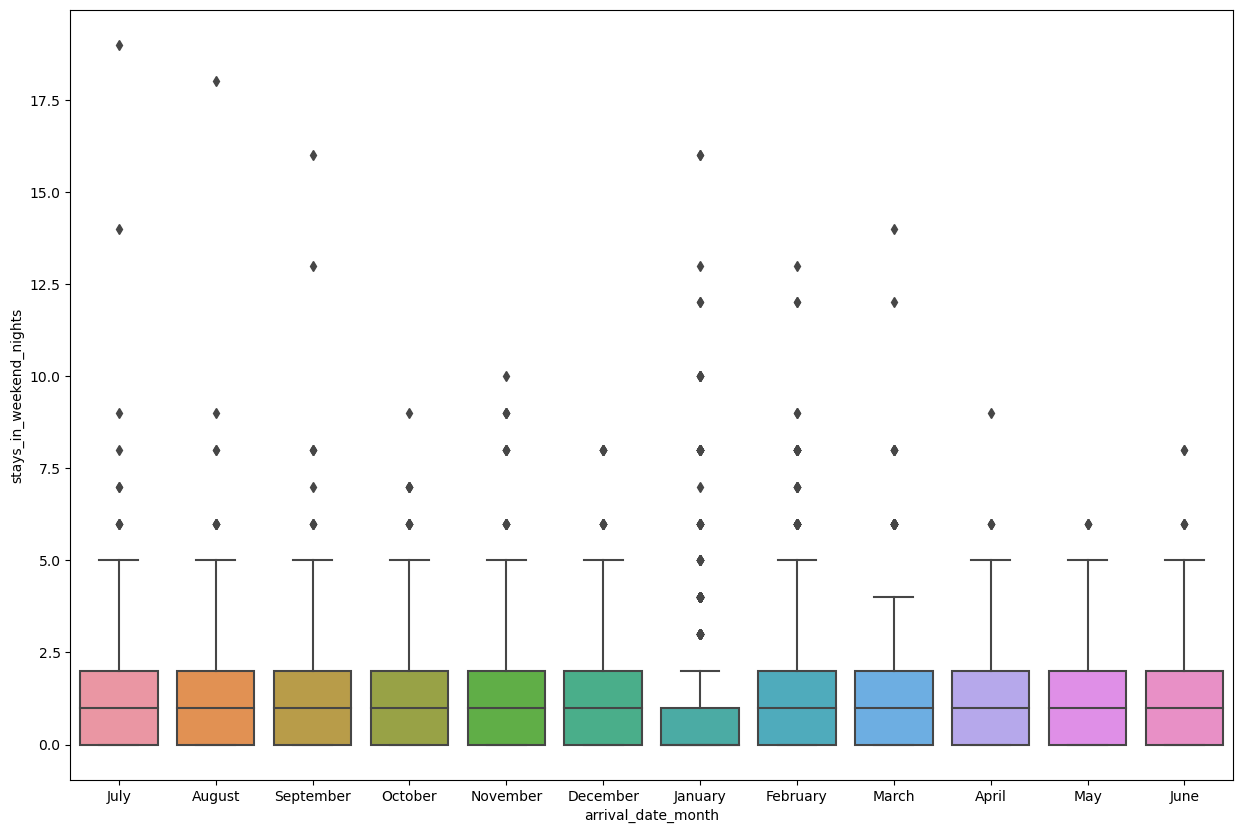

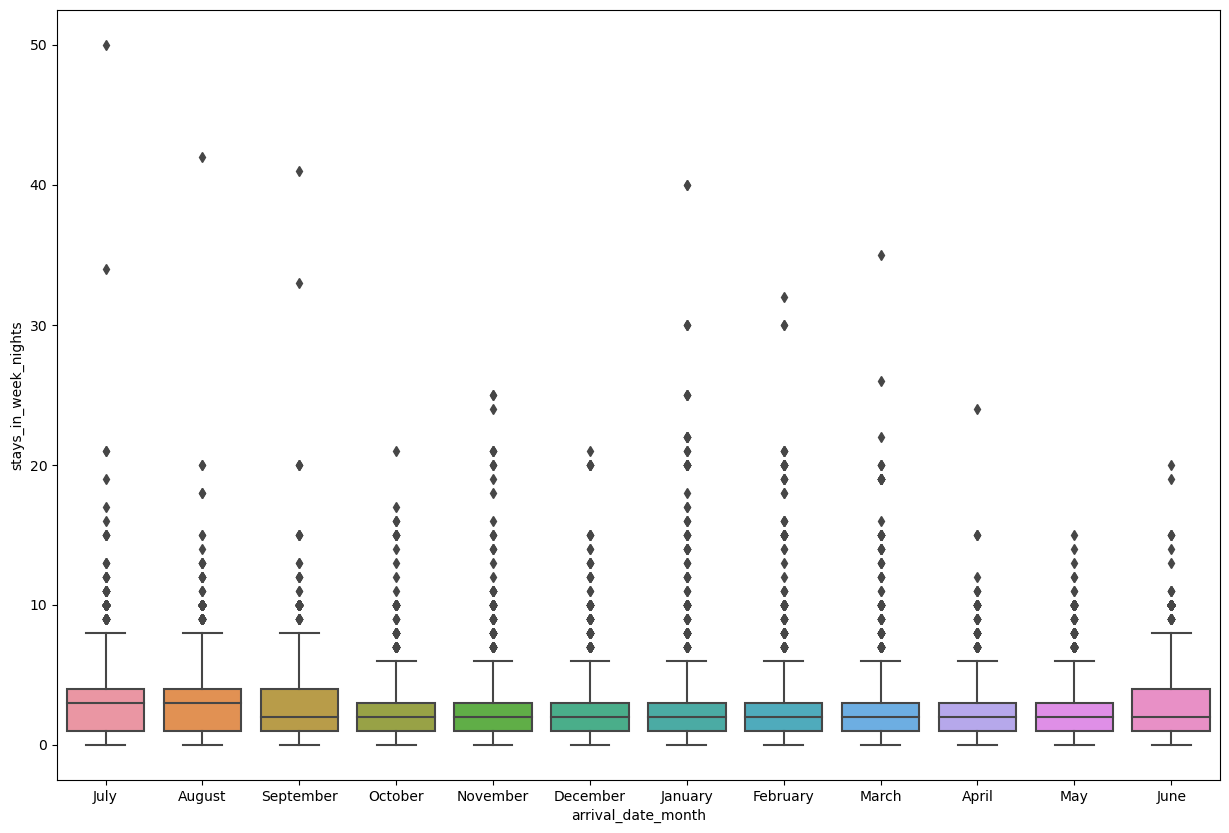

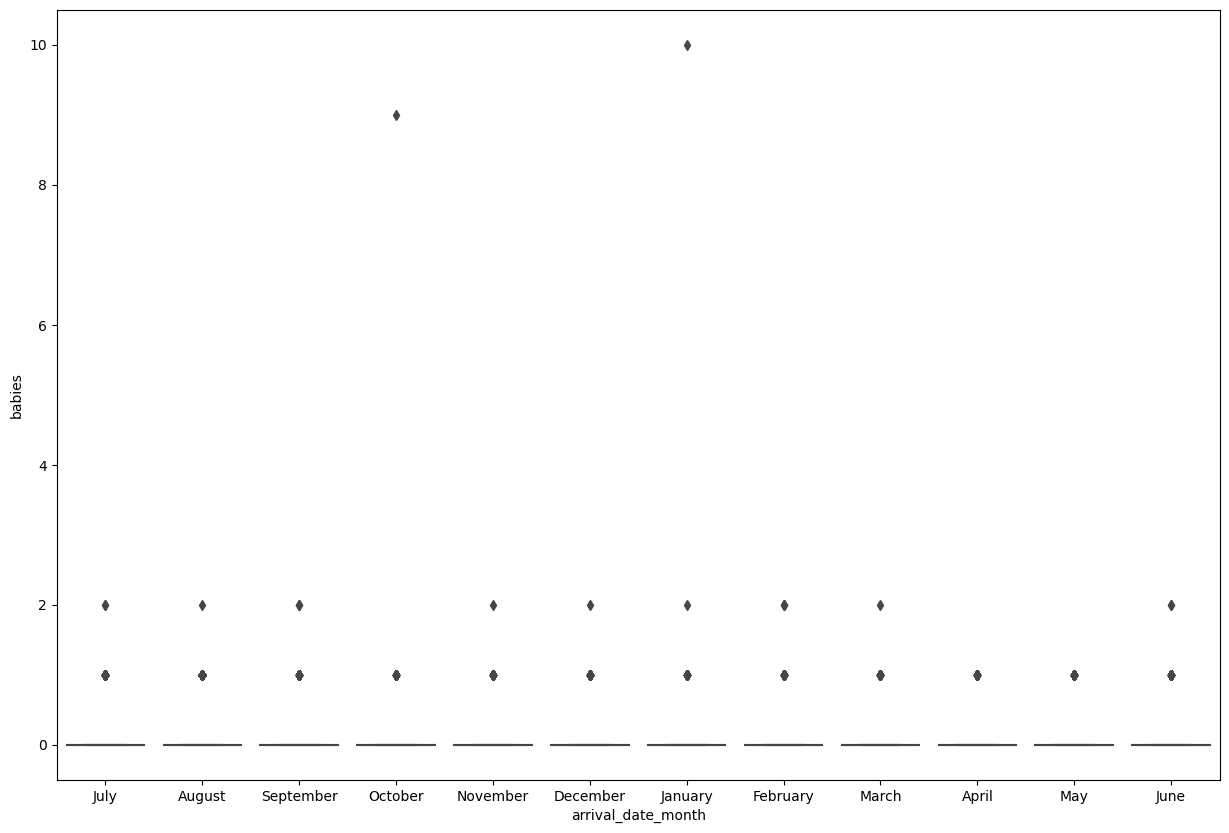

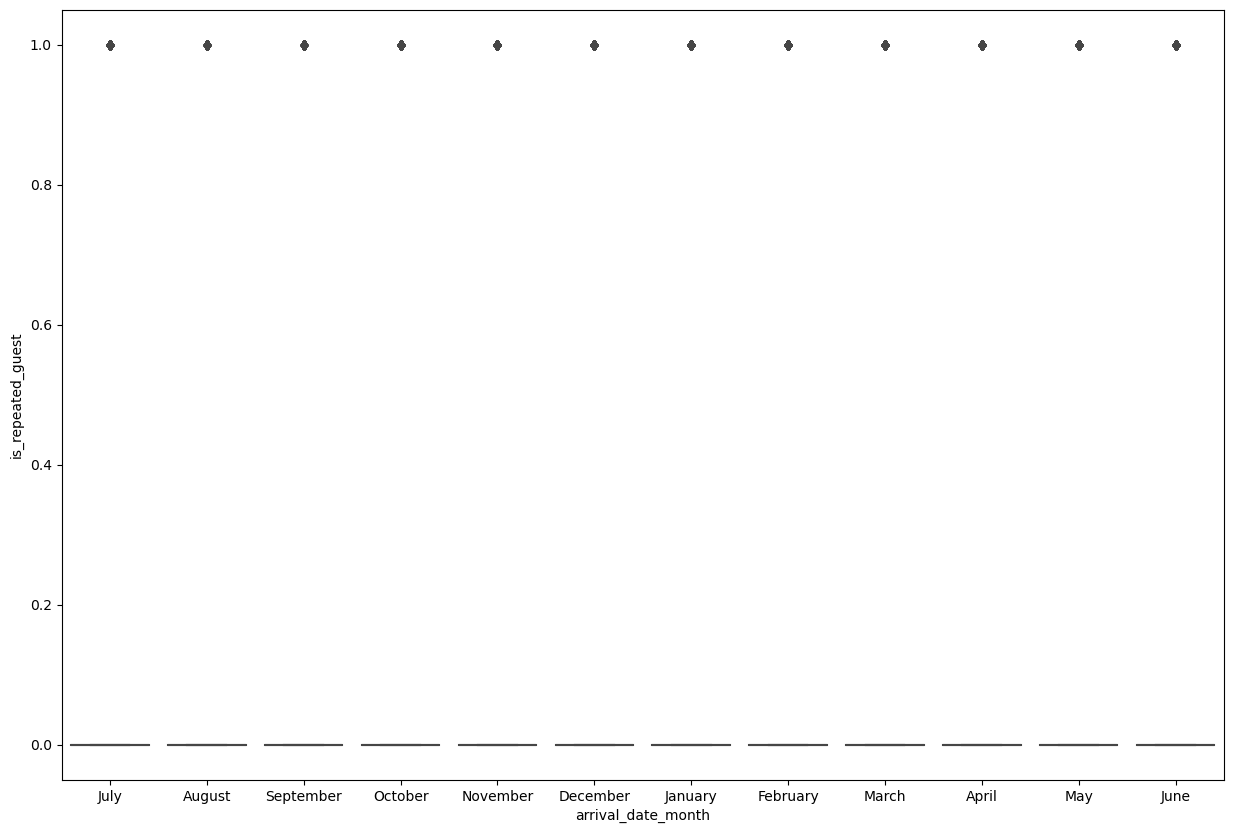

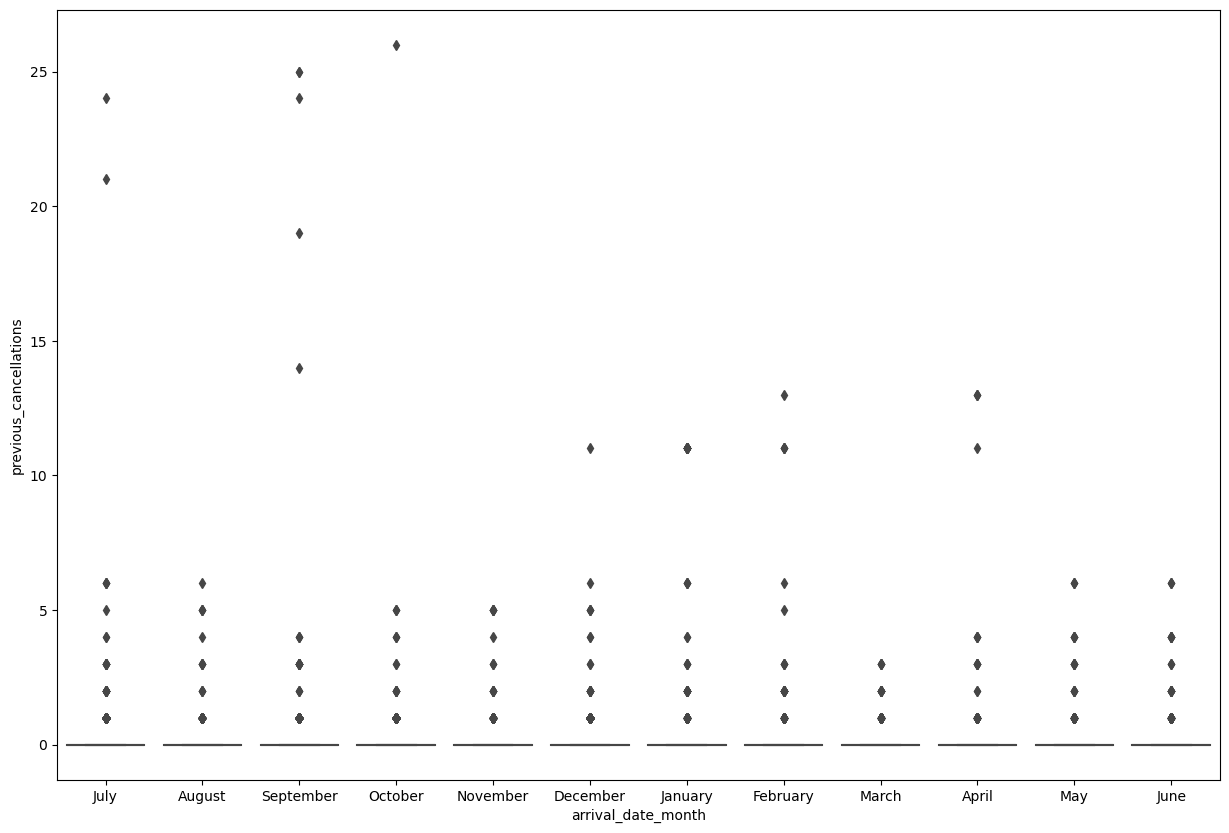

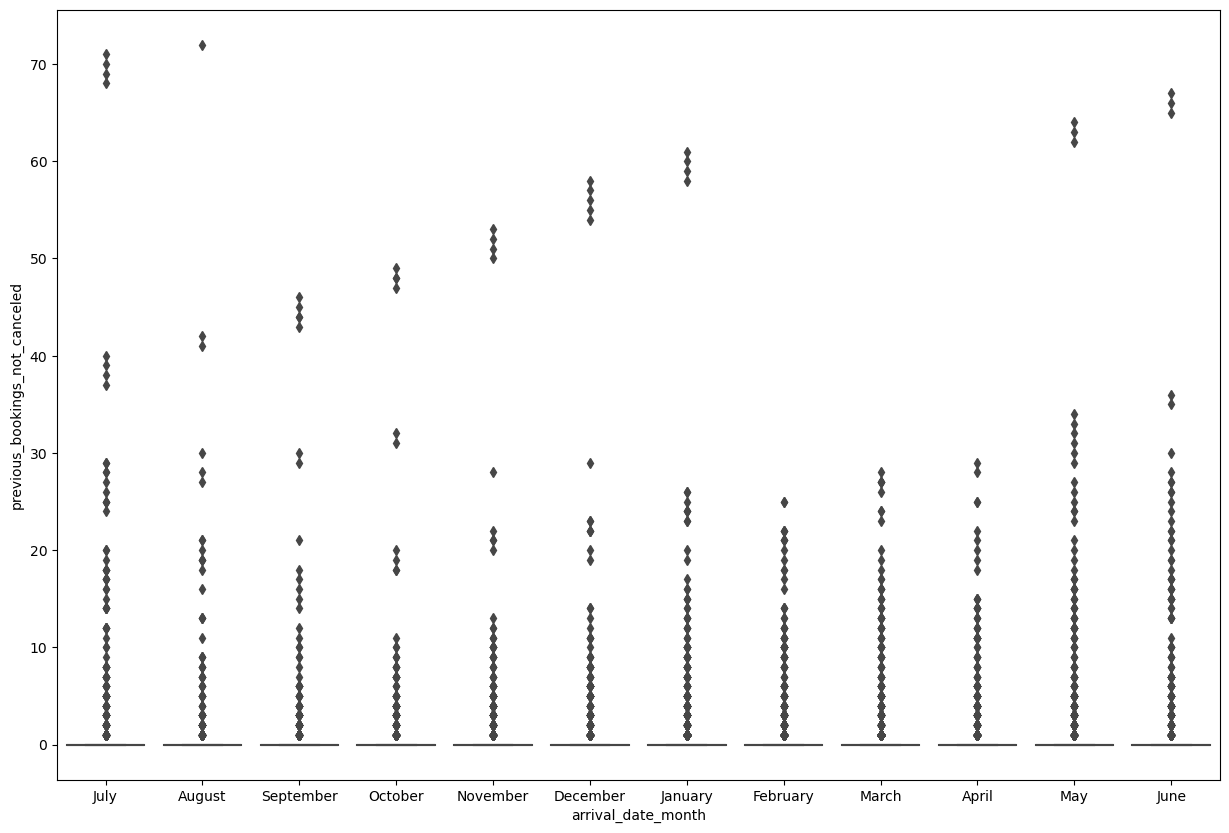

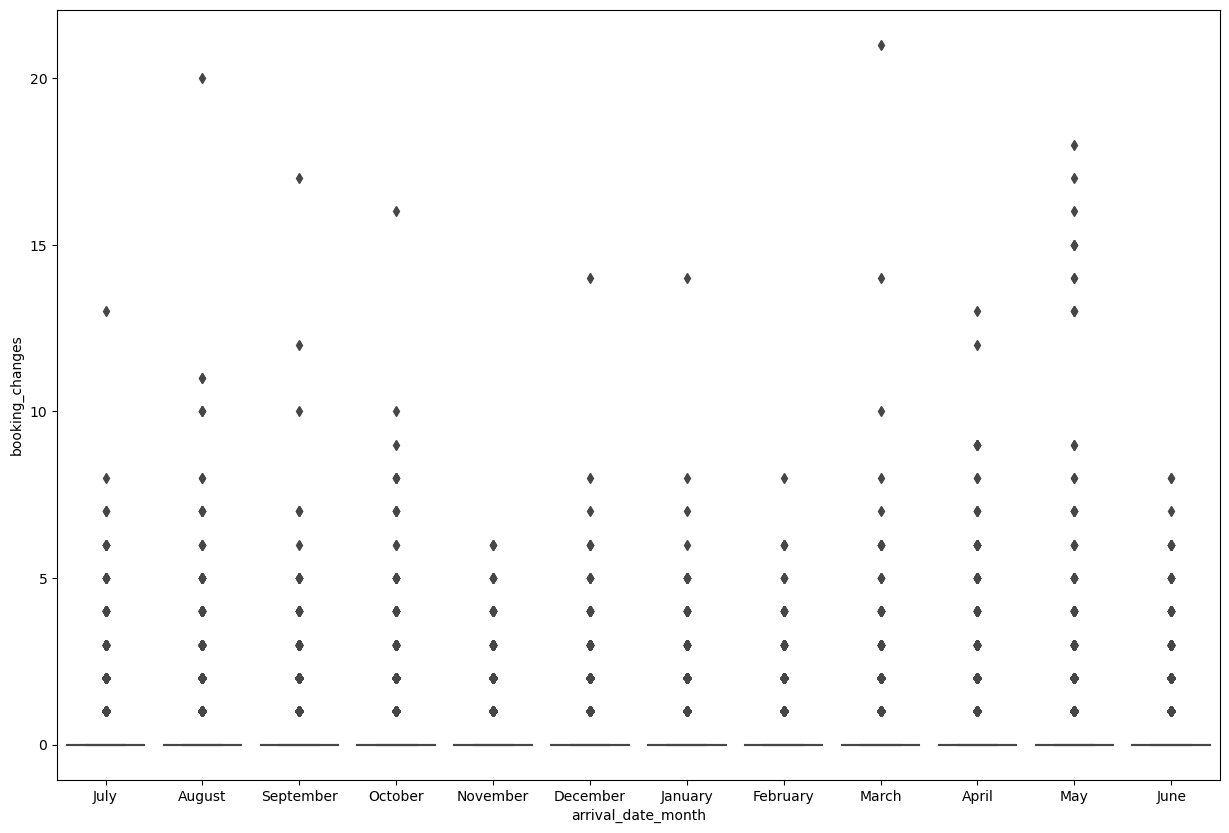

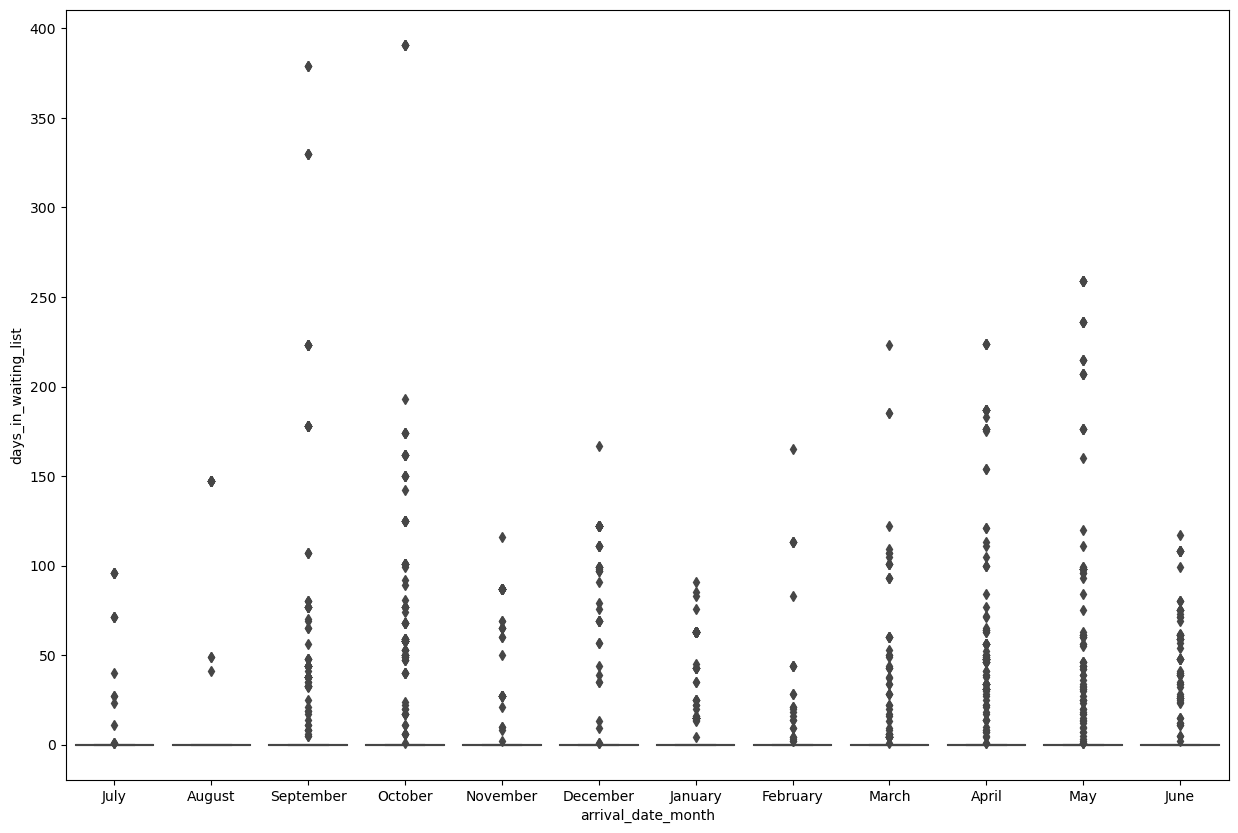

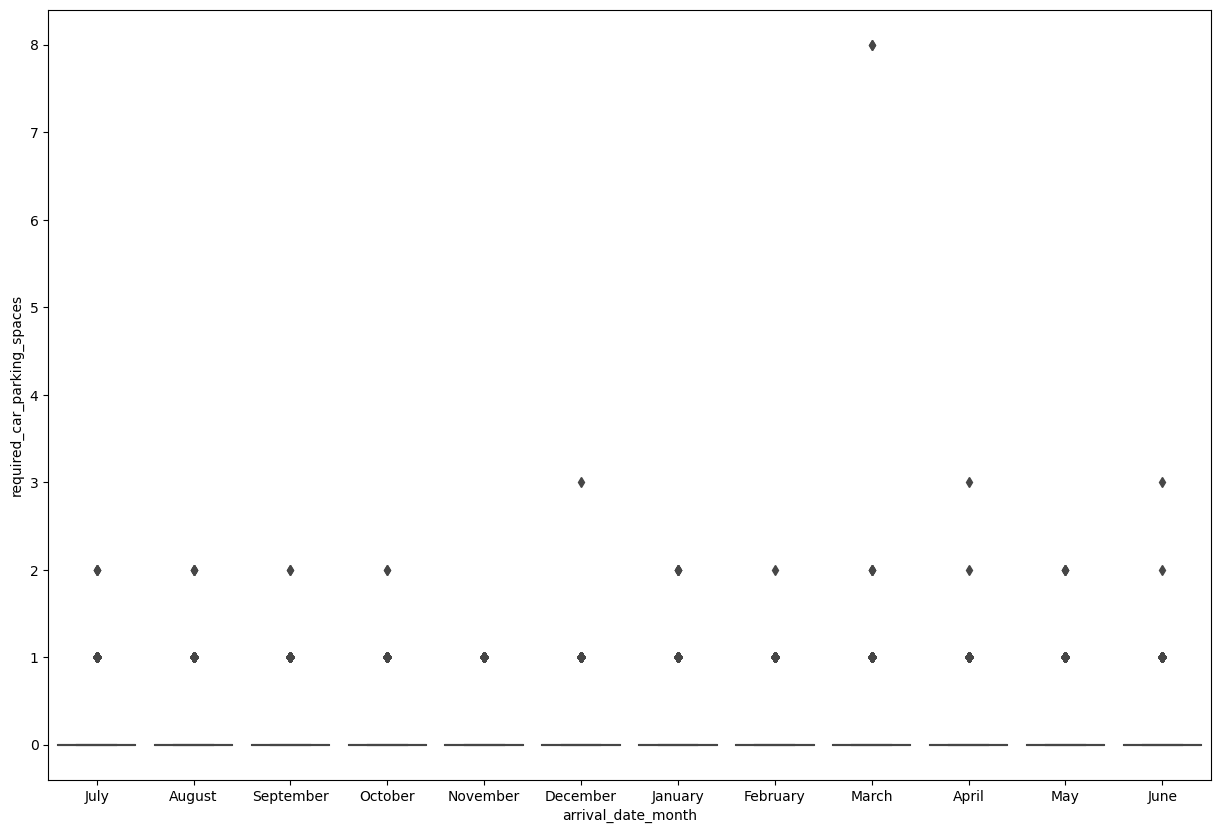

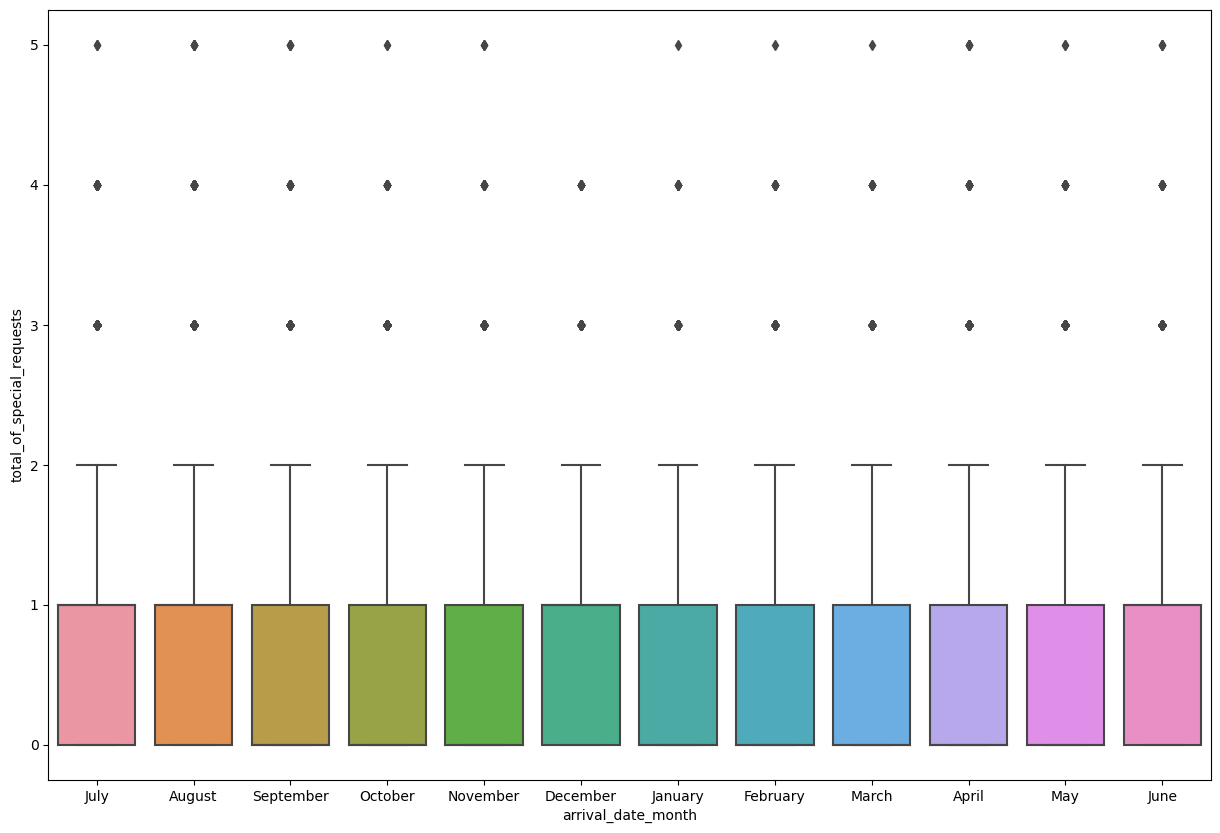

In [35]:
for col in numerical_data:
    plt.figure(figsize = (15,10))
    sns.boxplot(x=data['arrival_date_month'], y=data[col], data= data)
    plt.show()

#### Pie charts for categorical columns

In [36]:
categorical_data

['hotel',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'agent',
 'company',
 'customer_type',
 'reservation_status']

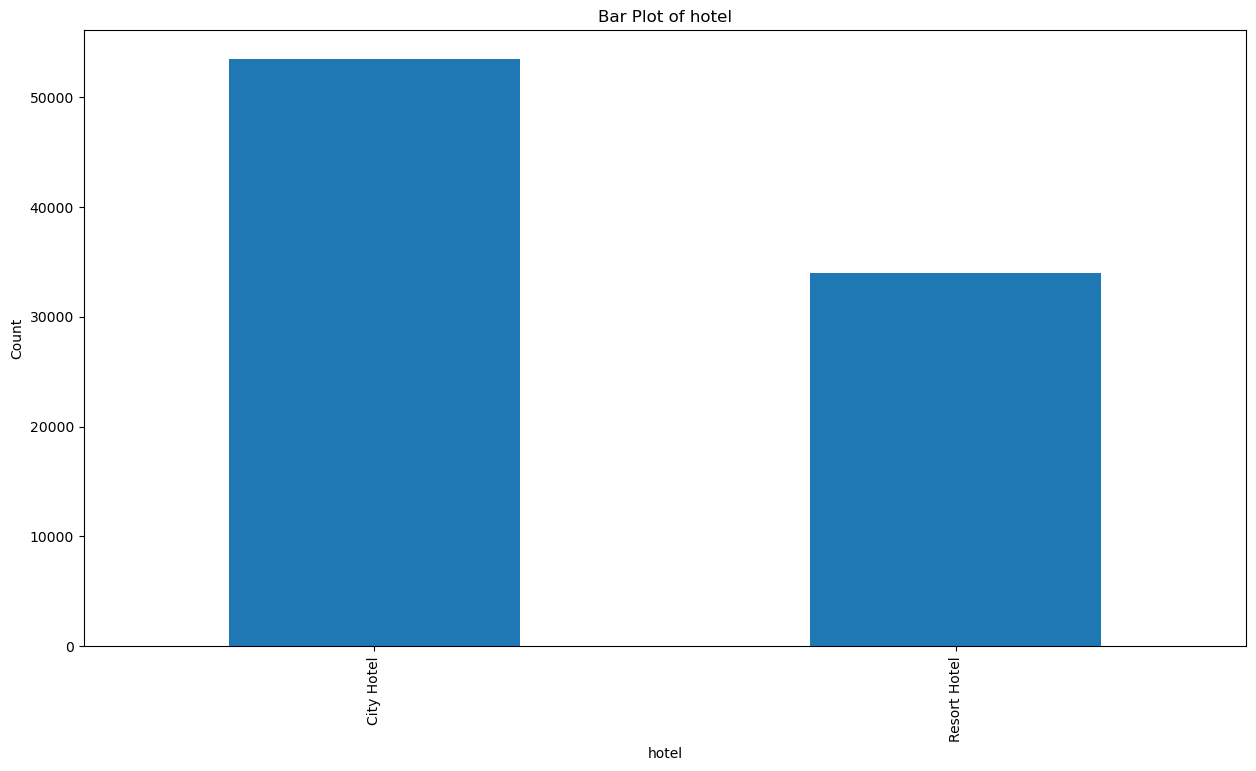

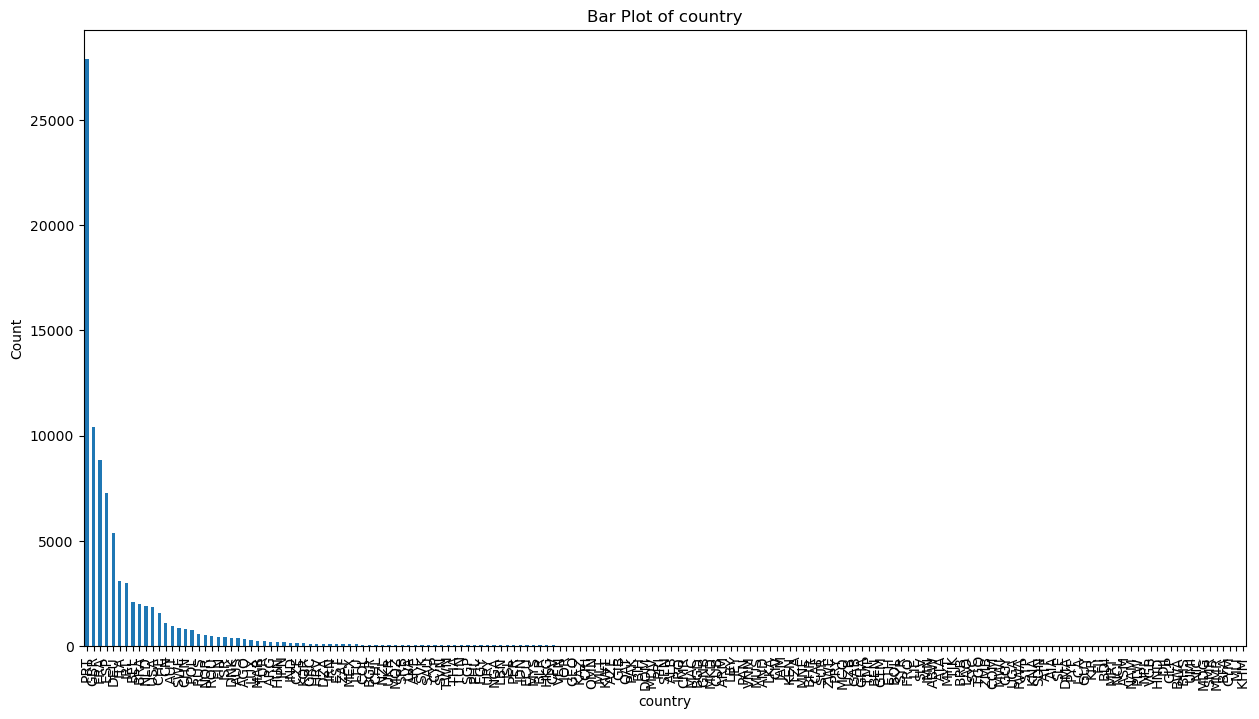

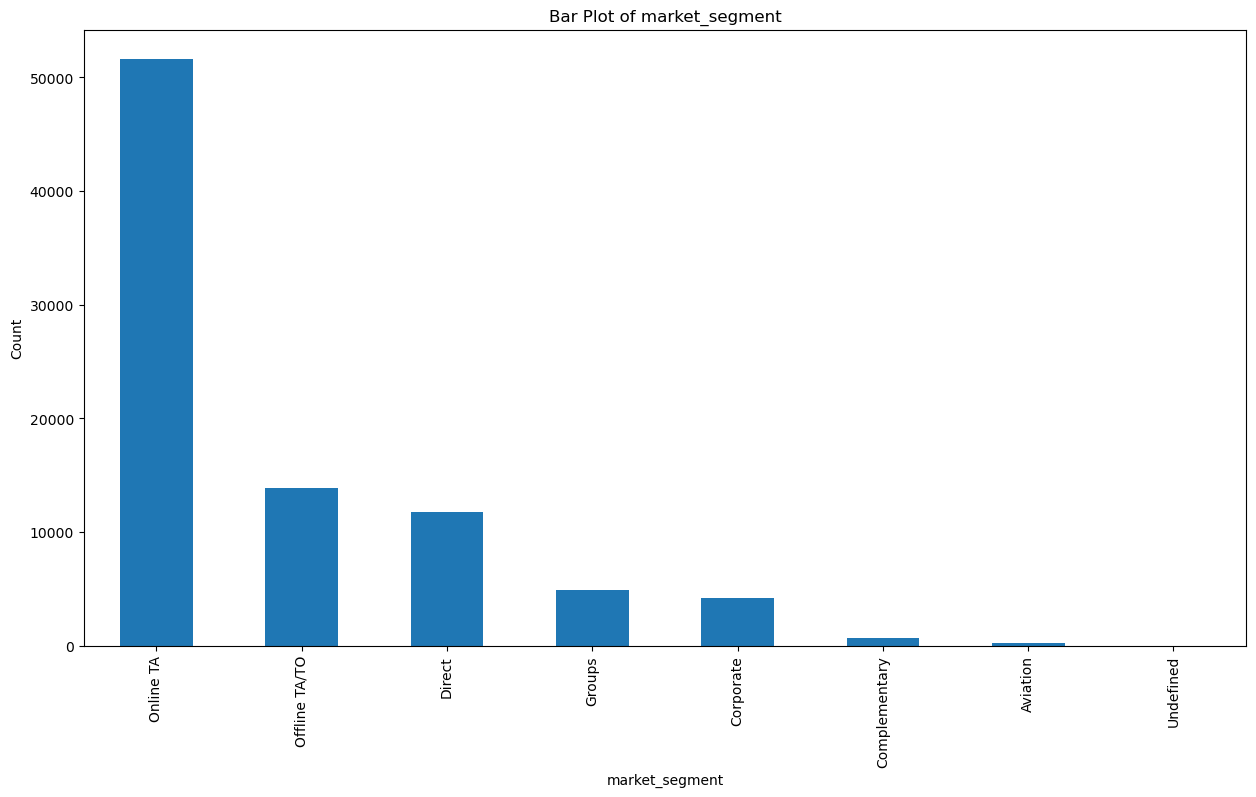

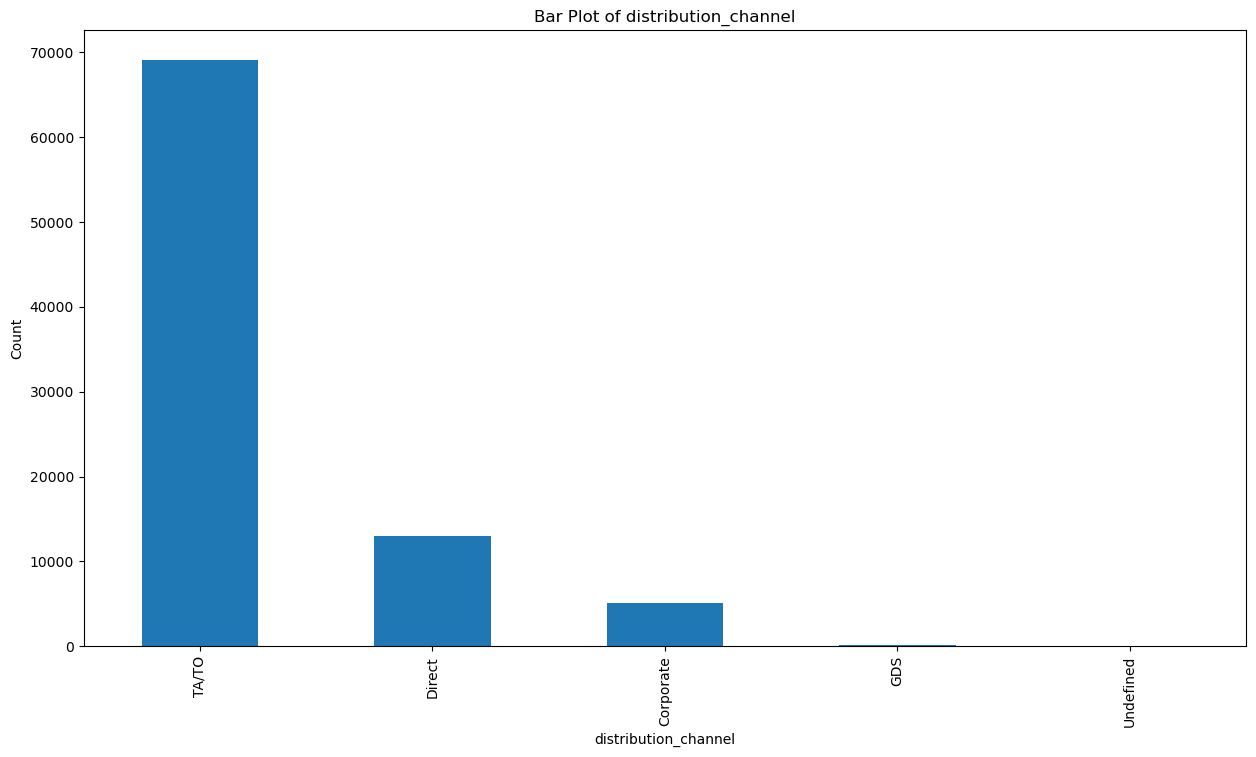

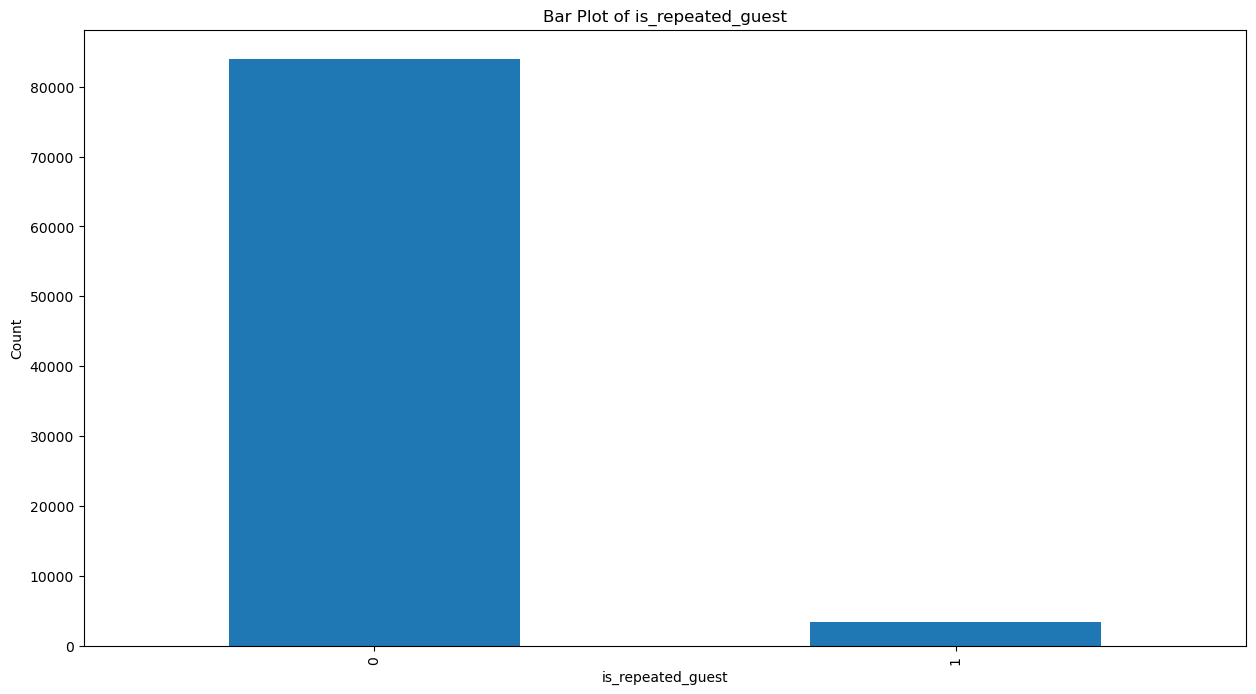

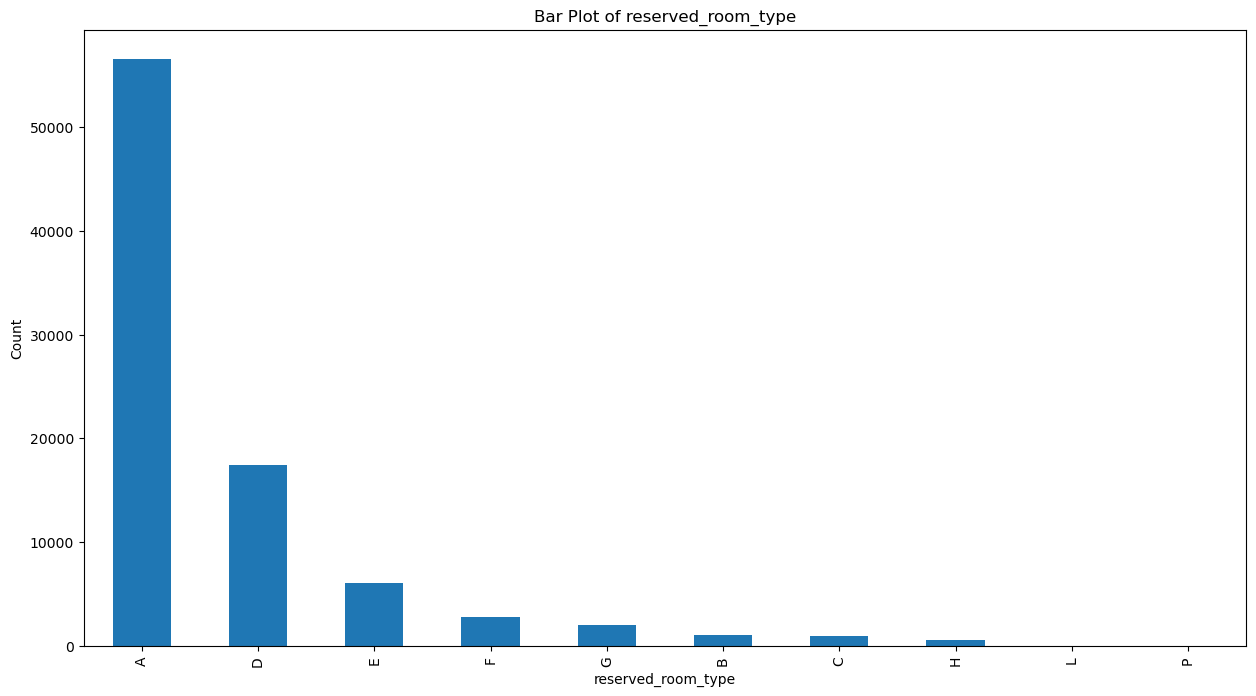

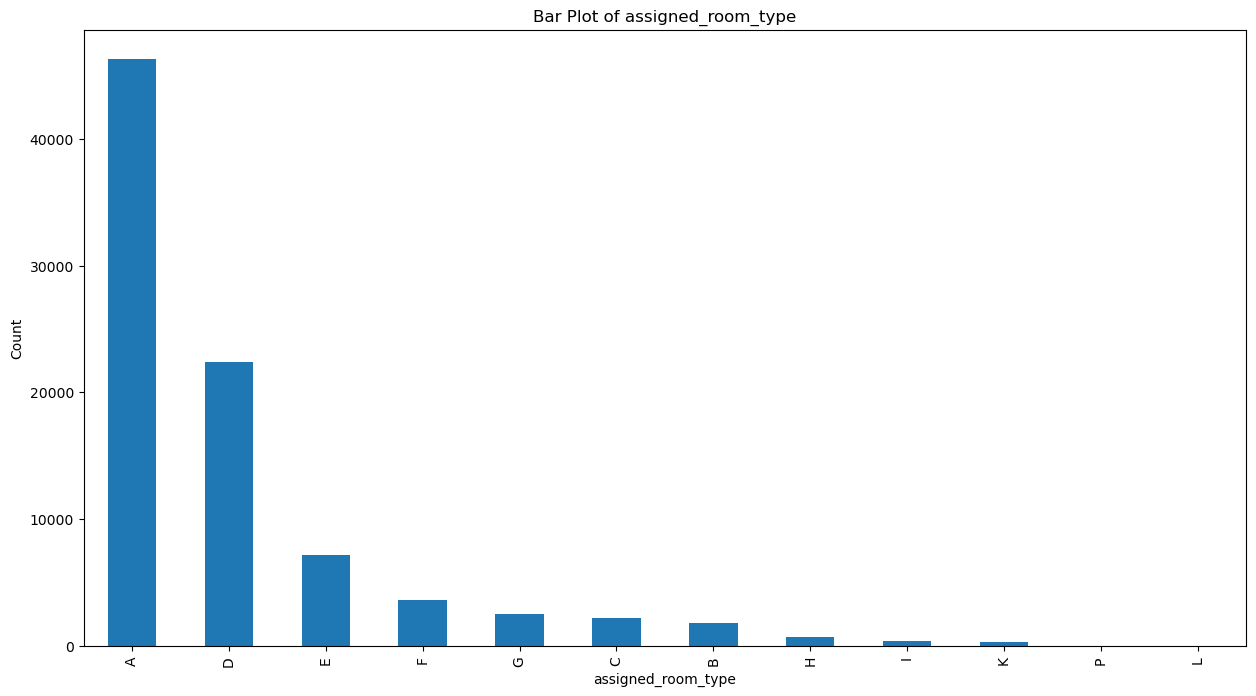

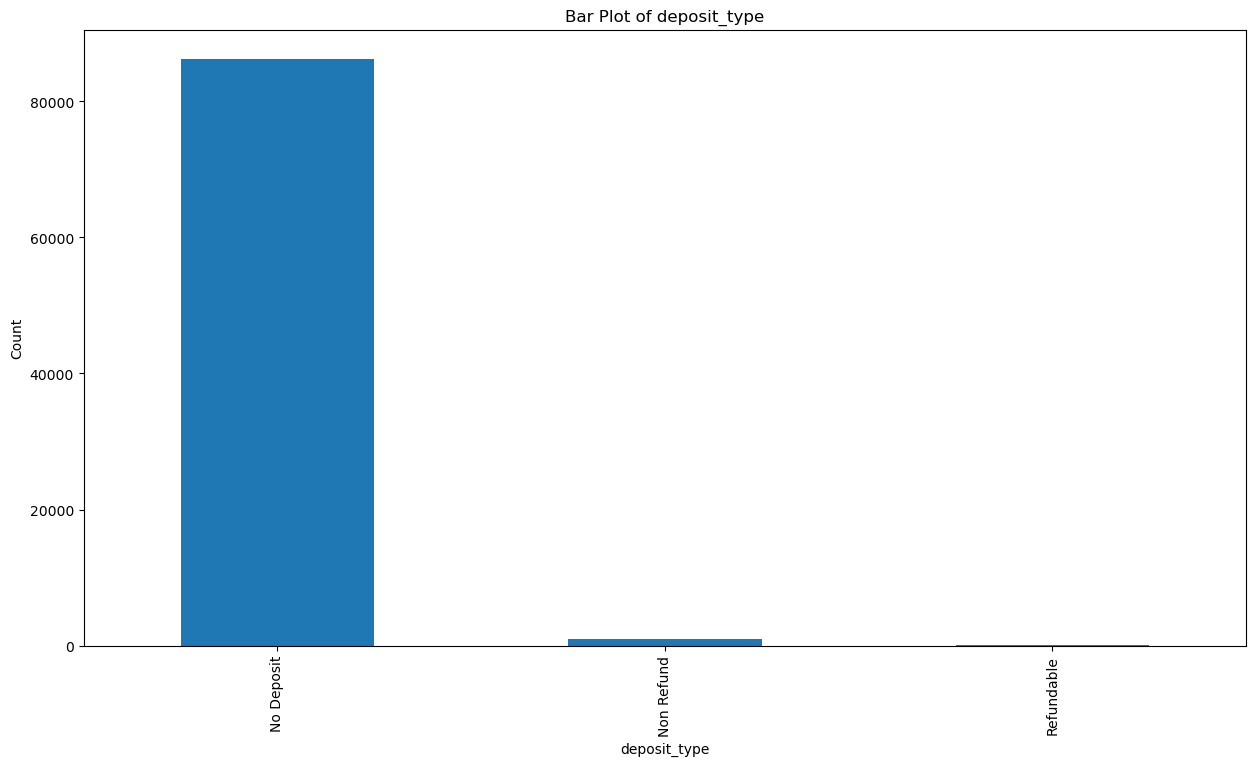

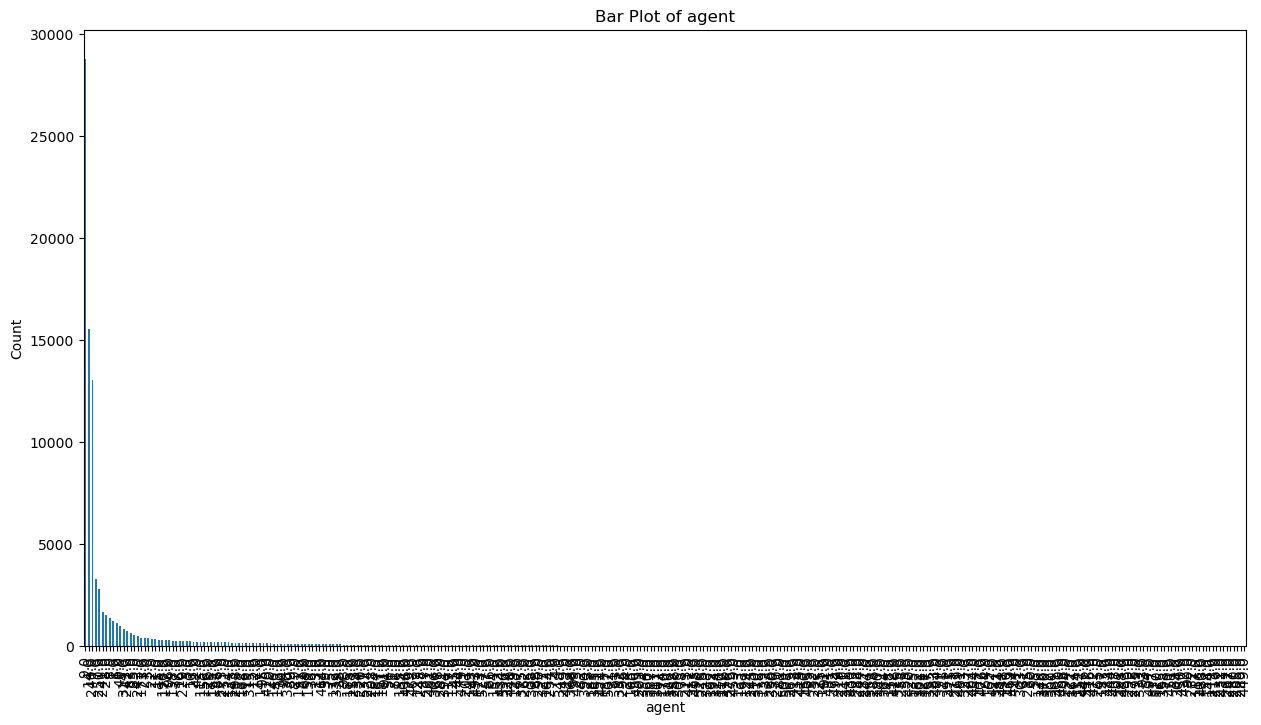

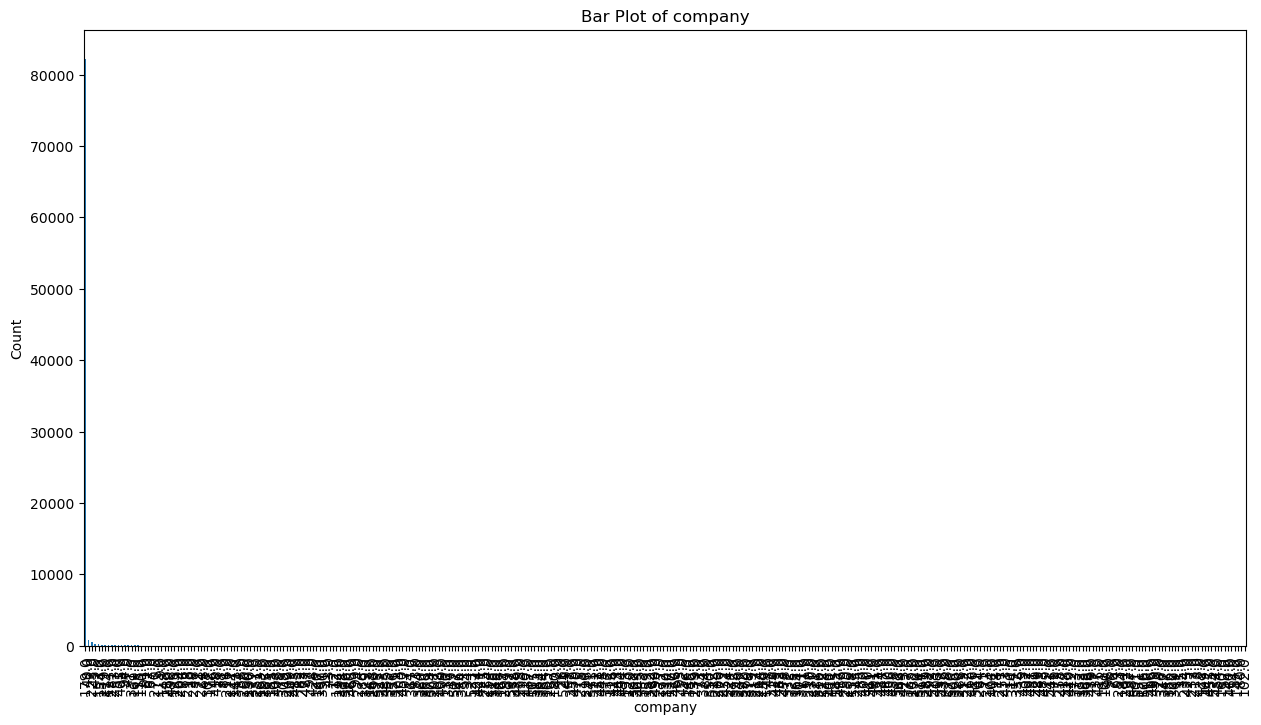

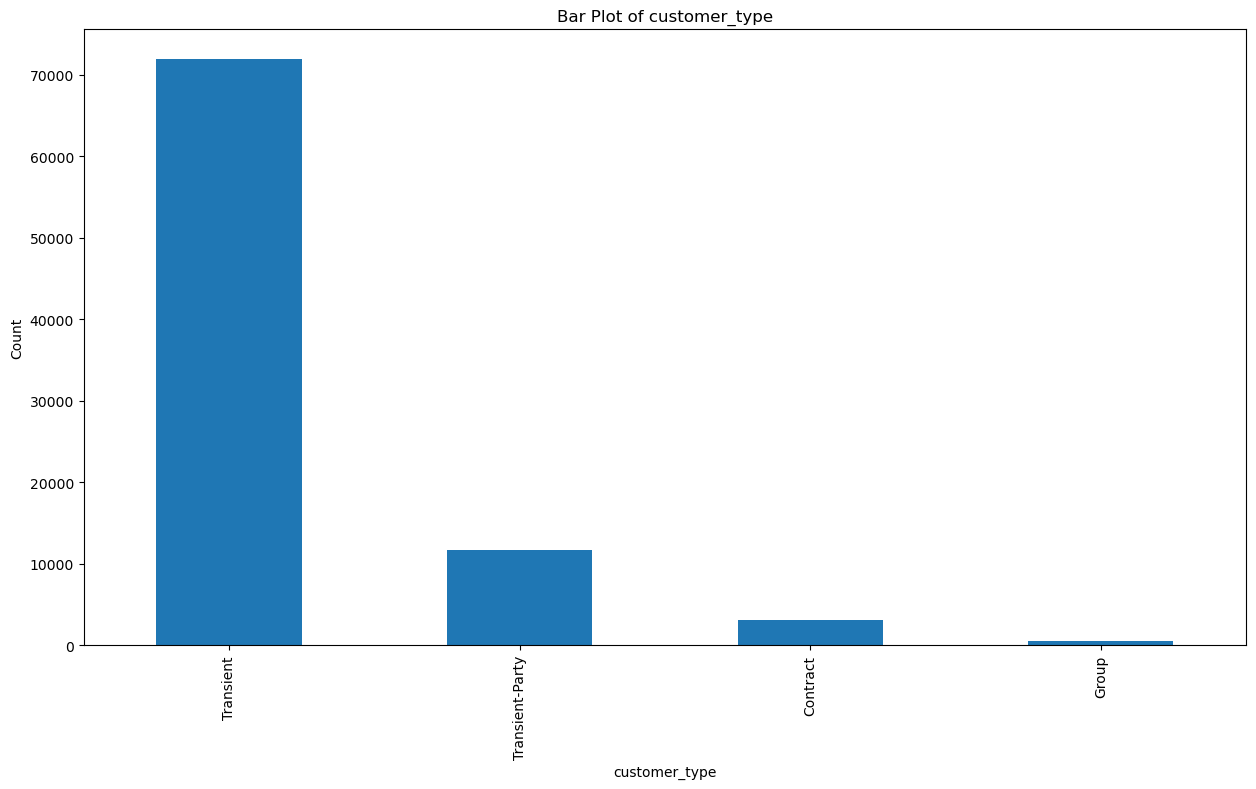

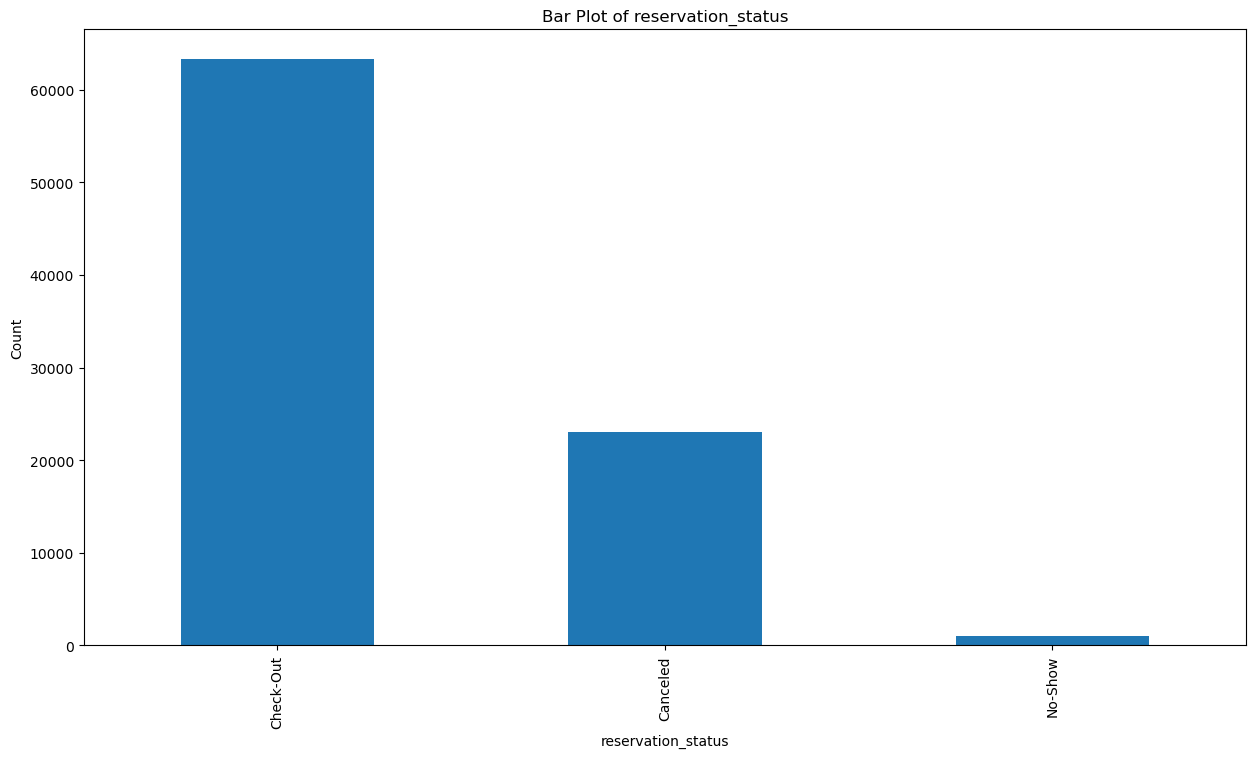

In [37]:
for col in categorical_data:
    plt.figure(figsize = (15,8))
    data[col].value_counts().plot(kind='bar')
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


#### Scatter plot


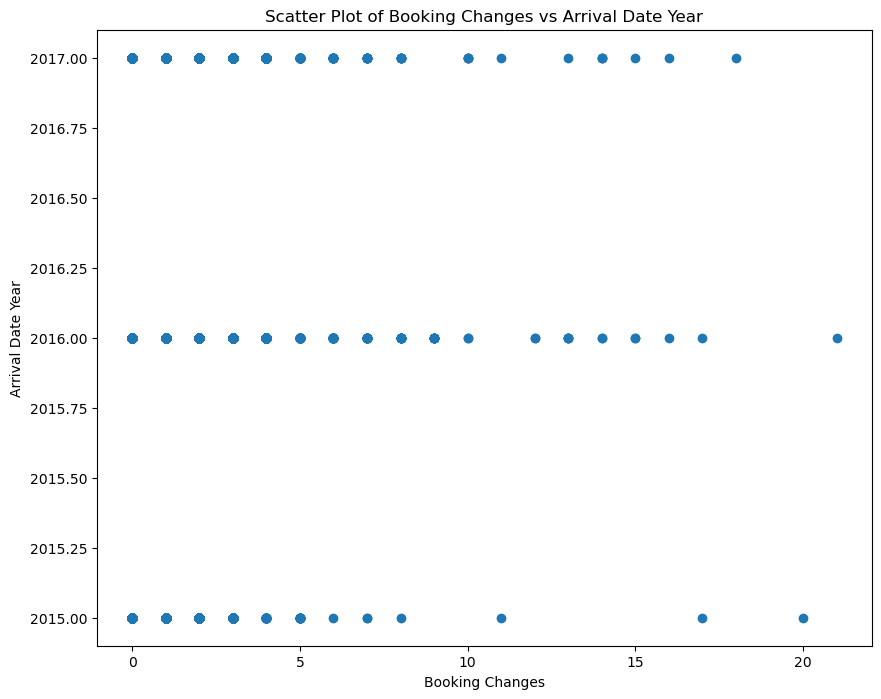

In [38]:
plt.figure(figsize=(10, 8))
plt.scatter(data['booking_changes'], data['arrival_date_year'])
plt.xlabel('Booking Changes')
plt.ylabel('Arrival Date Year')
plt.title('Scatter Plot of Booking Changes vs Arrival Date Year')
plt.show()

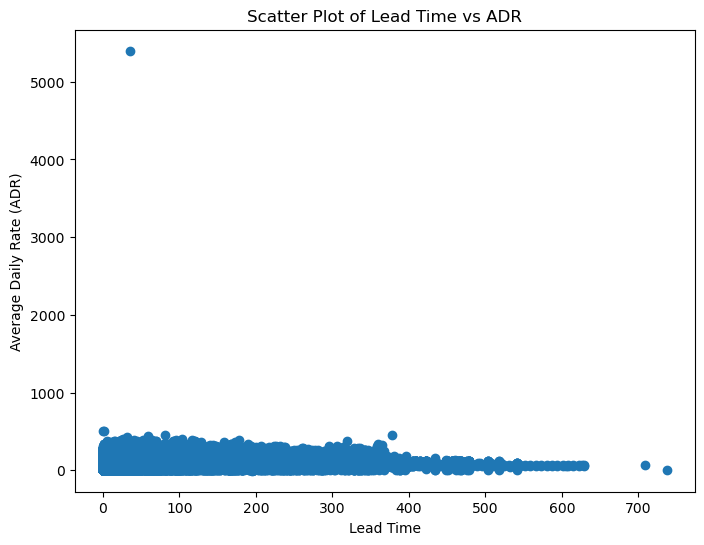

In [39]:
plt.figure(figsize=(8, 6))
plt.scatter(data['lead_time'], data['adr'])
plt.xlabel('Lead Time')
plt.ylabel('Average Daily Rate (ADR)')
plt.title('Scatter Plot of Lead Time vs ADR')
plt.show()

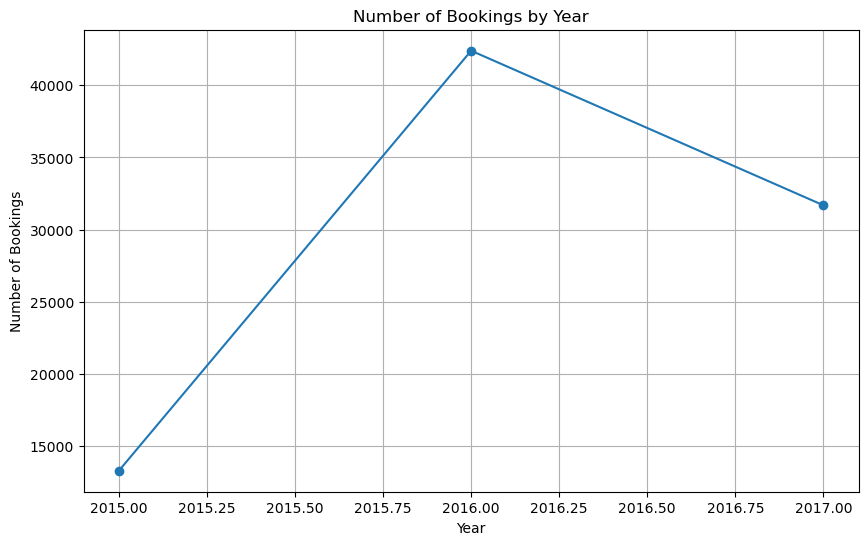

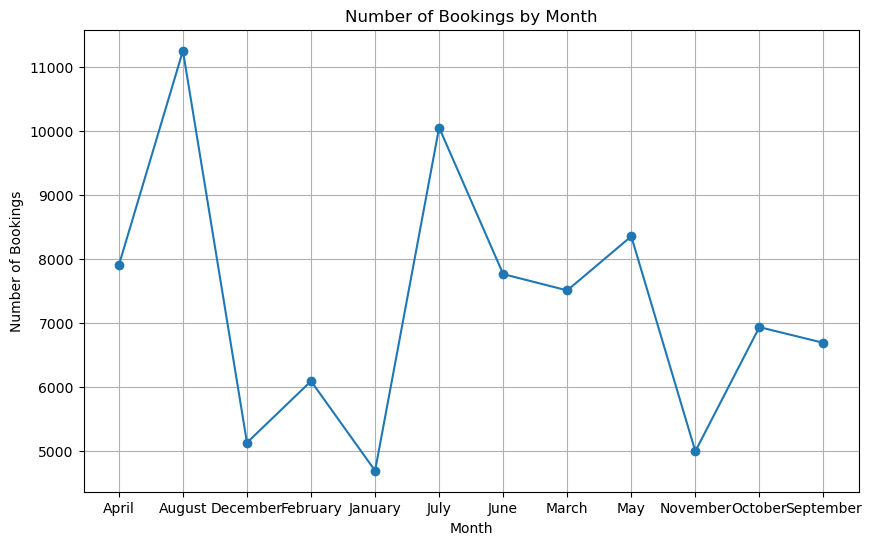

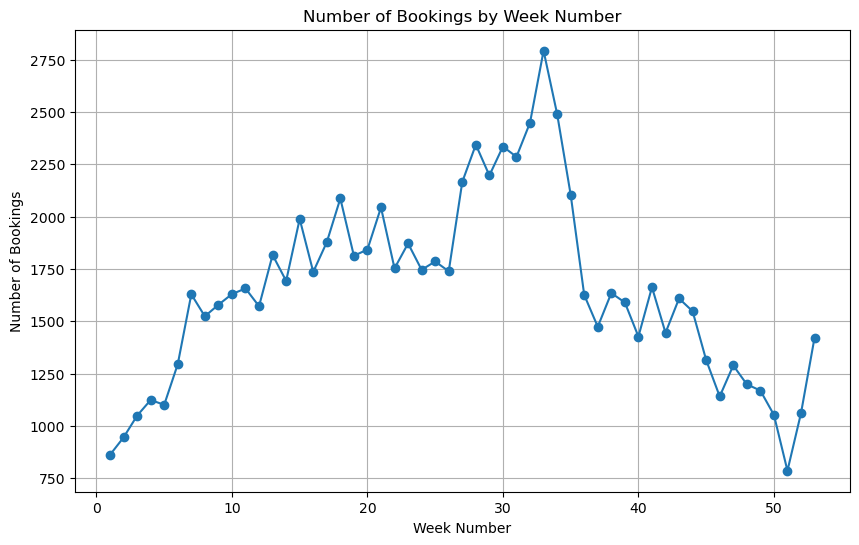

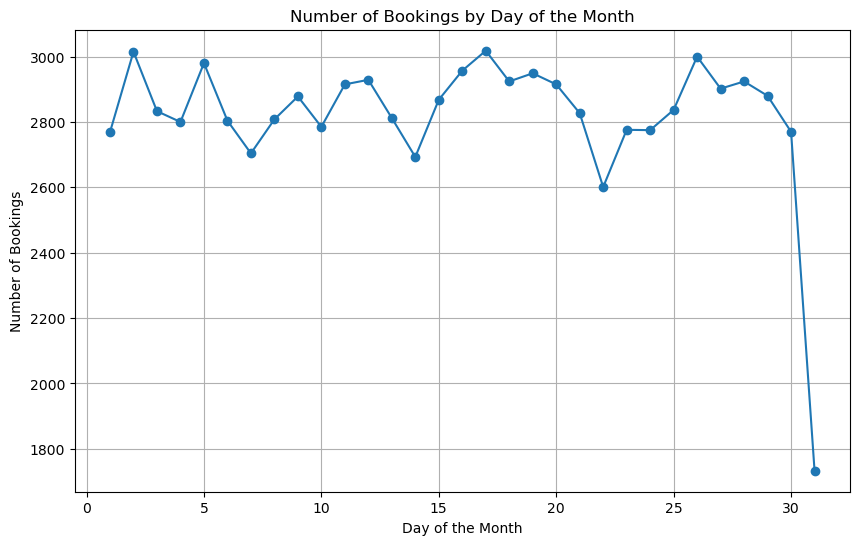

In [40]:
# Combine year, month, and day columns into a single datetime column
data['arrival_date'] = pd.to_datetime(data[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']].astype(str).agg('-'.join, axis=1))

# Aggregate by year
data_year = data.groupby('arrival_date_year').size()

# Aggregate by month
data_month = data.groupby('arrival_date_month').size()

# Aggregate by week number
data_week = data.groupby('arrival_date_week_number').size()

# Aggregate by day of the month
data_day = data.groupby('arrival_date_day_of_month').size()

# Plot by year
plt.figure(figsize=(10, 6))
plt.plot(data_year.index, data_year.values, marker='o')
plt.title('Number of Bookings by Year')
plt.xlabel('Year')
plt.ylabel('Number of Bookings')
plt.grid(True)
plt.show()

# Plot by month
plt.figure(figsize=(10, 6))
plt.plot(data_month.index, data_month.values, marker='o')
plt.title('Number of Bookings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.grid(True)
plt.show()

# Plot by week number
plt.figure(figsize=(10, 6))
plt.plot(data_week.index, data_week.values, marker='o')
plt.title('Number of Bookings by Week Number')
plt.xlabel('Week Number')
plt.ylabel('Number of Bookings')
plt.grid(True)
plt.show()

# Plot by day of the month
plt.figure(figsize=(10, 6))
plt.plot(data_day.index, data_day.values, marker='o')
plt.title('Number of Bookings by Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Bookings')
plt.grid(True)
plt.show()

In [41]:
correlation_matrix = data[numerical_data].corr()

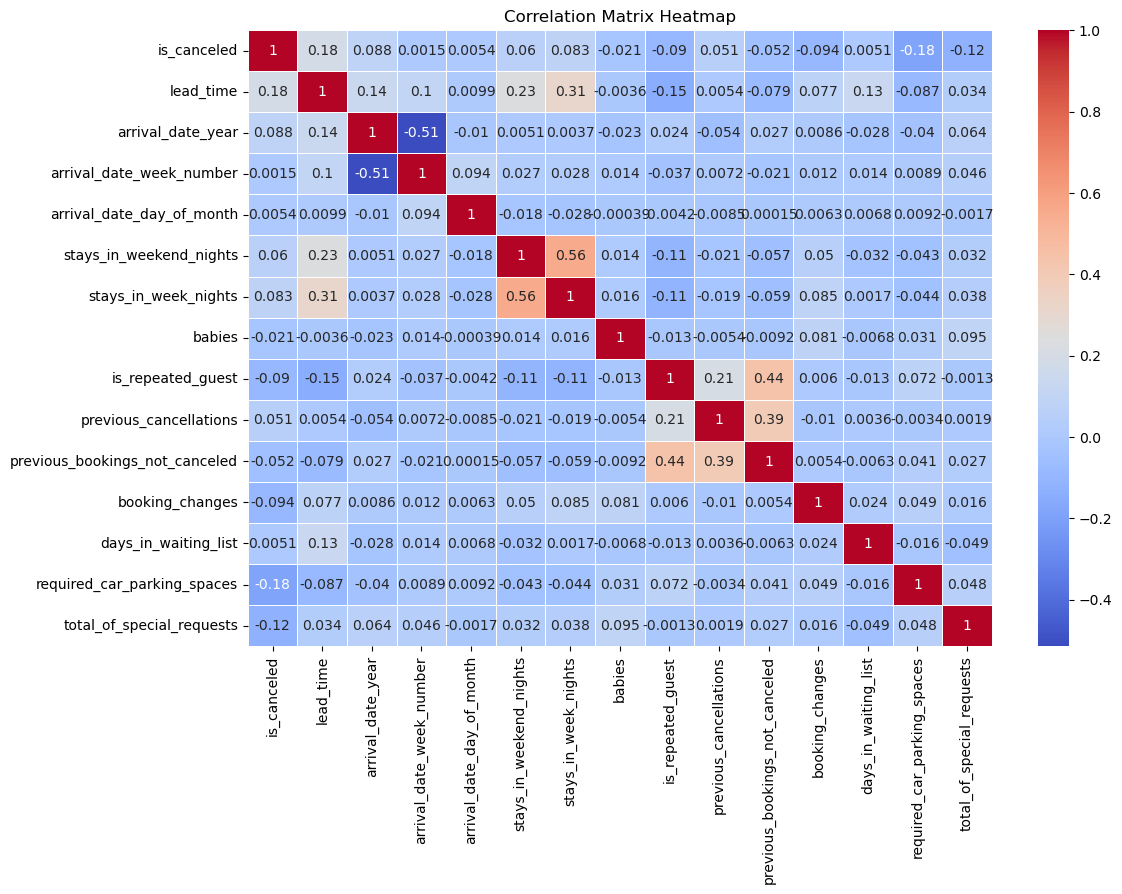

In [42]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [43]:
# Columns to encode
label_encode_cols = ['hotel', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']


# Apply Label Encoding
label_encoders = {}
for col in label_encode_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le




In [44]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,1,0,342,2015,July,27,1,0,0,2.0,...,14.0,179.0,0,2,0.0,0,0,1,01/07/2015,2015-07-01
1,1,0,737,2015,July,27,1,0,0,2.0,...,14.0,179.0,0,2,0.0,0,0,1,01/07/2015,2015-07-01
2,1,0,7,2015,July,27,1,0,1,1.0,...,14.0,179.0,0,2,75.0,0,0,1,02/07/2015,2015-07-01
3,1,0,13,2015,July,27,1,0,1,1.0,...,304.0,179.0,0,2,75.0,0,0,1,02/07/2015,2015-07-01
4,1,0,14,2015,July,27,1,0,2,2.0,...,240.0,179.0,0,2,98.0,0,1,1,03/07/2015,2015-07-01


In [45]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date'],
      dtype='object')

In [46]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,1,0,342,2015,July,27,1,0,0,2.0,...,14.0,179.0,0,2,0.0,0,0,1,01/07/2015,2015-07-01
1,1,0,737,2015,July,27,1,0,0,2.0,...,14.0,179.0,0,2,0.0,0,0,1,01/07/2015,2015-07-01
2,1,0,7,2015,July,27,1,0,1,1.0,...,14.0,179.0,0,2,75.0,0,0,1,02/07/2015,2015-07-01
3,1,0,13,2015,July,27,1,0,1,1.0,...,304.0,179.0,0,2,75.0,0,0,1,02/07/2015,2015-07-01
4,1,0,14,2015,July,27,1,0,2,2.0,...,240.0,179.0,0,2,98.0,0,1,1,03/07/2015,2015-07-01


In [47]:
# Create a contingency table for 'hotel' and 'is_canceled'
contingency_table = pd.crosstab(data['hotel'], data['is_canceled'])
print("Contingency table for hotel and is_canceled:\n", contingency_table)

# Create more contingency tables as needed
contingency_table = pd.crosstab(data['market_segment'], data['is_canceled'])
print("Contingency table for market_segment and is_canceled:\n", contingency_table)


Contingency table for hotel and is_canceled:
 is_canceled      0      1
hotel                    
0            37379  16053
1            25974   7975
Contingency table for market_segment and is_canceled:
 is_canceled         0      1
market_segment              
0                 182     45
1                 614     88
2                3696    510
3               10061   1737
4                3605   1338
5               11823   2062
6               33372  18246
7                   0      2


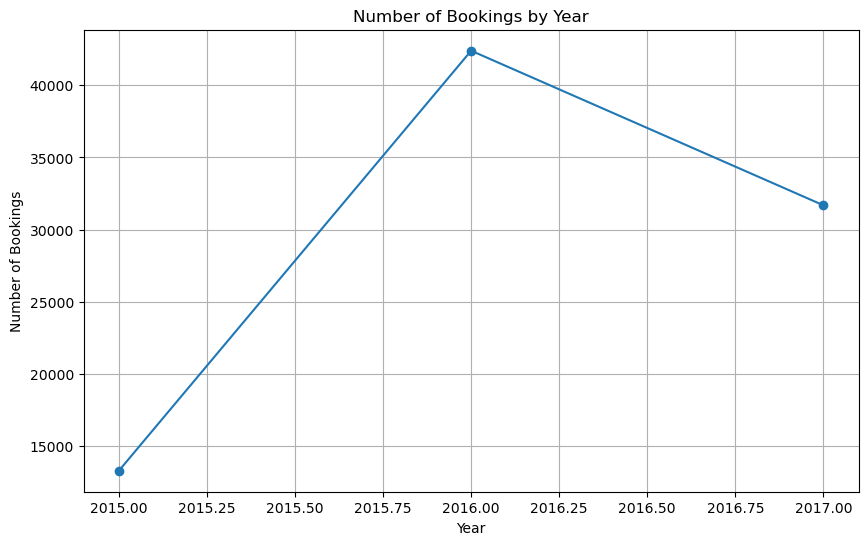

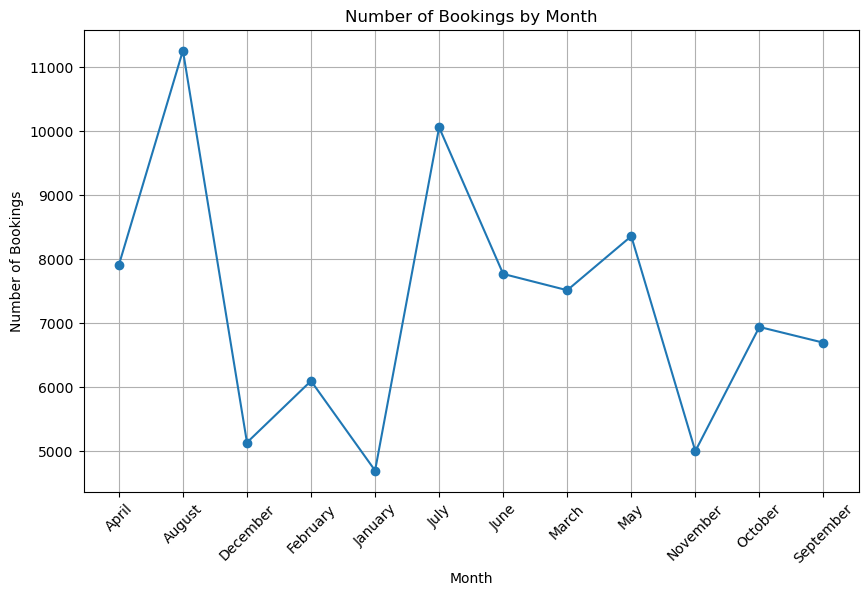

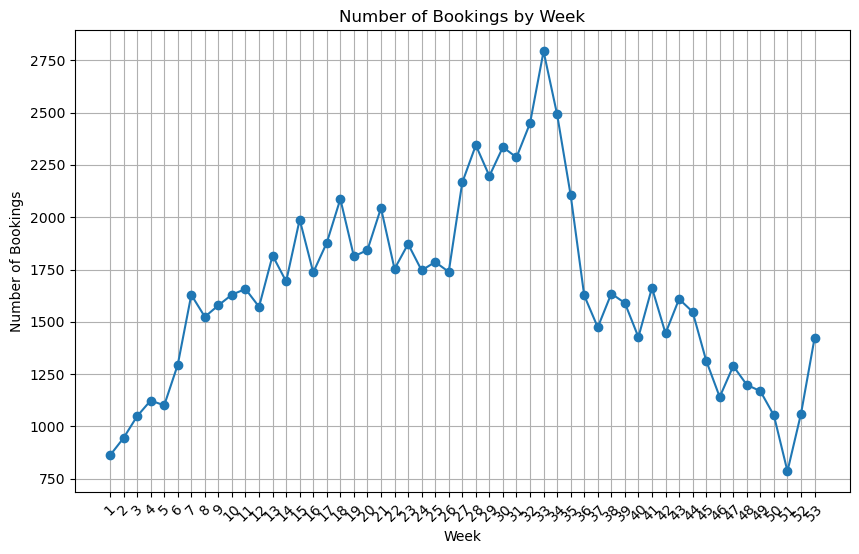

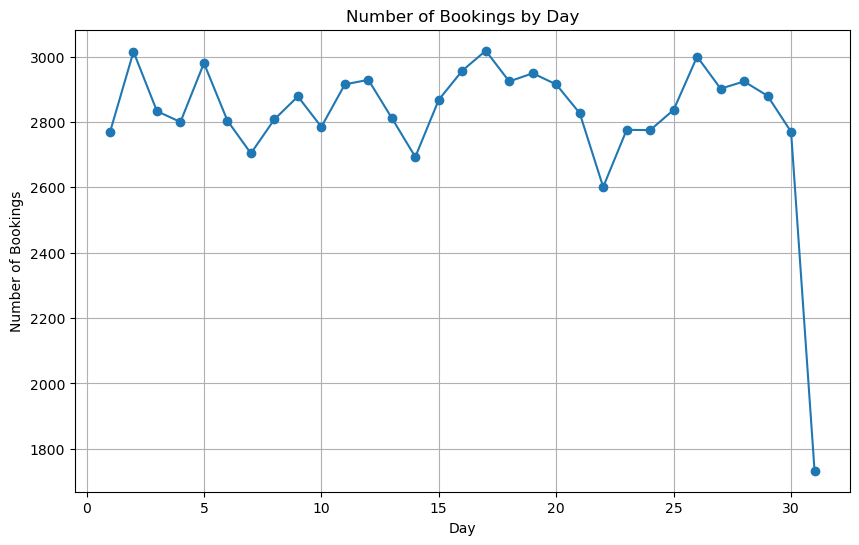

In [49]:
# Plot by year
plt.figure(figsize=(10, 6))
plt.plot(data_year.index, data_year.values, marker='o')
plt.title('Number of Bookings by Year')
plt.xlabel('Year')
plt.ylabel('Number of Bookings')
plt.grid(True)
plt.show()

# Plot by month
plt.figure(figsize=(10, 6))
plt.plot(data_month.index.astype(str), data_month.values, marker='o')
plt.title('Number of Bookings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot by week
plt.figure(figsize=(10, 6))
plt.plot(data_week.index.astype(str), data_week.values, marker='o')
plt.title('Number of Bookings by Week')
plt.xlabel('Week')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot by day
plt.figure(figsize=(10, 6))
plt.plot(data_day.index, data_day.values, marker='o')
plt.title('Number of Bookings by Day')
plt.xlabel('Day')
plt.ylabel('Number of Bookings')
plt.grid(True)
plt.show()





In [ ]:
# Calculate the duration of stay
data['duration_of_stay'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
# Derive new features from the arrival_date
data['arrival_month_name'] = data['arrival_date'].dt.month_name()
data['arrival_day_of_week'] = data['arrival_date'].dt.day_name()

# Define a function to map months to seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

# Apply the function to create a new column for season
data['arrival_season'] = data['arrival_date'].dt.month.apply(get_season)


# Combine year, month, and day columns into a single datetime column
data['arrival_date'] = pd.to_datetime(data[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']].astype(str).agg('-'.join, axis=1))

# Calculate the duration of stay
data['duration_of_stay'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']

# Derive new features from the arrival_date
data['arrival_month_name'] = data['arrival_date'].dt.month_name()
data['arrival_day_of_week'] = data['arrival_date'].dt.day_name()

# Define a function to map months to seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

# Apply the function to create a new column for season
data['arrival_season'] = data['arrival_date'].dt.month.apply(get_season)

# Display the first few rows to verify the new features
data[['arrival_date', 'duration_of_stay', 'arrival_month_name', 'arrival_day_of_week', 'arrival_season']].head()


In [ ]:
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'],dayfirst= True)

In [ ]:
data['reservation_status_date']

In [ ]:
#extracting new feature from the reservation_status_date column
data['reservation_day_of_week']= data['reservation_status_date'].dt.day_name()
data['reservation_month'] = data['reservation_status_date'].dt.month_name()
data['reservation_day'] = data['reservation_status_date'].dt.day
data['reservation_hour'] = data['reservation_status_date'].dt.hour
#verifying the new feature
data[['reservation_status_date', 'reservation_day_of_week', 'reservation_month', 'reservation_day', 'reservation_hour']].head()